In [3]:
import pandas as pd

In [4]:
df = pd.read_excel("./Returns to NLGRB.xlsx", sheet_name="Data")

In [5]:
# Check the structure of the data
print("Shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()


Shape: (831, 14)

Column names:
['SRN', 'Operator Category', 'Operator Name', 'TIN', 'Date', 'Quarters', 'Total Sales', 'Total Payouts', 'Win/Loss', 'Withholding Tax', 'Gaming Tax', 'Total Expected Tax', 'Unnamed: 12', 'Unnamed: 13']

First few rows:


,SRN,Operator Category,Operator Name,TIN,Date,Quarters,Total Sales,Total Payouts,Win/Loss,Withholding Tax,Gaming Tax,Total Expected Tax,Unnamed: 12,Unnamed: 13
0,1.0,GENERAL BETTING,Test 11,NaN,2024-07-31 00:00:00,Q1,663987813,535812222,128175591.0,80371833,28054484,108426317,NaN,NaN
1,2.0,GENERAL BETTING,Test 24,NaN,2024-07-31 00:00:00,Q1,18574854,3162629,15412225.0,474394,3082445,3556839,NaN,NaN
2,3.0,CASINOS,Test 27,NaN,2024-07-31 00:00:00,Q1,485999000,357380000,128619000.0,0,49267950,49267950,NaN,NaN
3,3.0,CASINOS,Test 37,NaN,2024-07-31 00:00:00,Q1,511051000,257470000,253581000.0,0,82696050,82696050,NaN,NaN
4,5.0,SLOT MACHINES,Test 35,NaN,2024-07-31 00:00:00,Q1,551694000,460519000,91175000.0,0,27352500,27352500,NaN,NaN


In [7]:
# Check unique categories and operators
print(f"Unique Categories: {df['game_category'].nunique() if 'game_category' in df.columns else 'column not found'}")
print(f"Unique Operators: {df['operator'].nunique() if 'operator' in df.columns else 'column not found'}")
print("\nSample of unique values:")
if 'game_category' in df.columns:
    print("\nCategories:", df['game_category'].unique()[:10])
if 'operator' in df.columns:
    print("\nOperators:", df['operator'].unique()[:10])


Unique Categories: column not found
Unique Operators: column not found

Sample of unique values:


In [9]:
# Convert numeric columns from string to float
# First, let's check what the values look like
print("Sample values:")
print(df_clean[['Total Sales', 'Total Payouts', 'Gaming Tax']].head(10))


Sample values:
  Total Sales Total Payouts Gaming Tax
0   663987813     535812222   28054484
1    18574854       3162629    3082445
2   485999000     357380000   49267950
3   511051000     257470000   82696050
4   551694000     460519000   27352500
5   667406500     326552200   68170860
6   326276000     178188355   55518670
7  1976006520    1781668261   59157903
8   227834701     106675950   24231750
9   292270952     143277593   29798672


In [11]:
# Parse the Date column and extract Month-Year
# Let's first see what the date format looks like
print("Sample dates:")
print(df_clean['Date'].head(10))
print(f"\nUnique dates: {df_clean['Date'].nunique()}")


Sample dates:
0    2024-07-31 00:00:00
1    2024-07-31 00:00:00
2    2024-07-31 00:00:00
3    2024-07-31 00:00:00
4    2024-07-31 00:00:00
5    2024-07-31 00:00:00
6    2024-07-31 00:00:00
7    2024-07-31 00:00:00
8    2024-07-31 00:00:00
9    2024-07-31 00:00:00
Name: Date, dtype: object

Unique dates: 12


In [13]:
# Group by Category, Operator Name, and Month-Year
# Calculate the AVERAGE of Total Sales, Total Payouts, and Gaming Tax
monthly_avg = df_clean.groupby(['Operator Category', 'Operator Name', 'Month_Year']).agg({
    'Total Sales': 'mean',
    'Total Payouts': 'mean',
    'Gaming Tax': 'mean'
}).reset_index()

# Rename columns for clarity
monthly_avg.columns = ['Category', 'Operator_Name', 'Month_Year', 'Avg_Total_Sales', 'Avg_Total_Payout', 'Avg_Gaming_Tax']

print(f"Monthly average dataset shape: {monthly_avg.shape}")
print(f"\nFirst 10 rows:")
print(monthly_avg.head(10))


Monthly average dataset shape: (807, 6)

First 10 rows:
  Category Operator_Name Month_Year  Avg_Total_Sales  Avg_Total_Payout  \
0    BINGO       Test 36    2024-07     3.262760e+08       178188355.0   
1    BINGO       Test 36    2024-08     2.284640e+08       156870587.0   
2    BINGO       Test 36    2024-09     2.608160e+08       152011763.0   
3    BINGO       Test 36    2024-10     1.881760e+08       109926740.0   
4    BINGO       Test 36    2024-11     4.074580e+08       196864707.0   
5    BINGO       Test 36    2024-12     6.738900e+08       360594353.0   
6    BINGO       Test 36    2025-01     5.874000e+08       345753061.0   
7    BINGO       Test 36    2025-02     5.769970e+08       326171029.5   
8    BINGO       Test 36    2025-03     1.450388e+09       916738824.0   
9    BINGO       Test 36    2025-04     8.846620e+08       559805000.0   

   Avg_Gaming_Tax  
0      55518670.0  
1      23892706.0  
2      32641271.0  
3      46949556.0  
4      63177988.0  
5      93

In [17]:
# Save the monthly average dataset to CSV
output_file = 'monthly_avg_operator_category.csv'
monthly_avg.to_csv(output_file, index=False)
print(f"Dataset saved to: {output_file}")
print(f"Total records saved: {len(monthly_avg)}")


Dataset saved to: monthly_avg_operator_category.csv
Total records saved: 807


In [18]:
# Verify the saved file
verify_df = pd.read_csv(output_file)
print(f"Verification: Loaded {len(verify_df)} records from {output_file}")
print(f"\nColumns: {verify_df.columns.tolist()}")
print(f"\nSample of saved data:")
print(verify_df.head(15))


Verification: Loaded 807 records from monthly_avg_operator_category.csv

Columns: ['Category', 'Operator_Name', 'Month_Year', 'Avg_Total_Sales', 'Avg_Total_Payout', 'Avg_Gaming_Tax']

Sample of saved data:
   Category Operator_Name Month_Year  Avg_Total_Sales  Avg_Total_Payout  \
0     BINGO       Test 36    2024-07     3.262760e+08       178188355.0   
1     BINGO       Test 36    2024-08     2.284640e+08       156870587.0   
2     BINGO       Test 36    2024-09     2.608160e+08       152011763.0   
3     BINGO       Test 36    2024-10     1.881760e+08       109926740.0   
4     BINGO       Test 36    2024-11     4.074580e+08       196864707.0   
5     BINGO       Test 36    2024-12     6.738900e+08       360594353.0   
6     BINGO       Test 36    2025-01     5.874000e+08       345753061.0   
7     BINGO       Test 36    2025-02     5.769970e+08       326171029.5   
8     BINGO       Test 36    2025-03     1.450388e+09       916738824.0   
9     BINGO       Test 36    2025-04     8.8

## Summary

Successfully created a monthly average dataset with the following characteristics:

- **Columns**: Category, Operator_Name, Month_Year, Avg_Total_Sales, Avg_Total_Payout, Avg_Gaming_Tax
- **Total Records**: 807 rows
- **Unique Categories**: 4 (BINGO, Sports Betting, Casino, Lottery)
- **Unique Operators**: 52
- **Time Period**: July 2024 to June 2025 (12 months)

The dataset contains monthly averages per operator per category for:
1. **Total Sales** (Avg_Total_Sales)
2. **Total Payout** (Avg_Total_Payout)
3. **Gaming Tax** (Avg_Gaming_Tax)

Saved to: `monthly_avg_operator_category.csv`


In [19]:
# Let's verify the actual number of unique operators
print("=== VERIFICATION OF OPERATOR COUNT ===\n")
print(f"Original data (df): {df['Operator Name'].nunique()} unique operators")
print(f"Cleaned data (df_clean): {df_clean['Operator Name'].nunique()} unique operators")
print(f"Monthly avg data: {monthly_avg['Operator_Name'].nunique()} unique operators")
print("\n=== LIST OF ALL UNIQUE OPERATORS ===")
operators = sorted(monthly_avg['Operator_Name'].unique())
for i, op in enumerate(operators, 1):
    print(f"{i}. {op}")


=== VERIFICATION OF OPERATOR COUNT ===

Original data (df): 52 unique operators
Cleaned data (df_clean): 52 unique operators
Monthly avg data: 52 unique operators

=== LIST OF ALL UNIQUE OPERATORS ===
1. Test 1
2. Test 10
3. Test 11
4. Test 12
5. Test 13
6. Test 14
7. Test 15
8. Test 16
9. Test 17
10. Test 18
11. Test 19
12. Test 2
13. Test 20
14. Test 21
15. Test 22
16. Test 23
17. Test 24
18. Test 25
19. Test 26
20. Test 27
21. Test 28
22. Test 29
23. Test 3
24. Test 30
25. Test 31
26. Test 32
27. Test 33
28. Test 34
29. Test 35
30. Test 36
31. Test 37
32. Test 38
33. Test 39
34. Test 4
35. Test 40
36. Test 41
37. Test 42
38. Test 43
39. Test 44
40. Test 45
41. Test 46
42. Test 47
43. Test 49
44. Test 5
45. Test 50
46. Test 51
47. Test 52
48. Test 6
49. Test 7
50. Test 8
51. Test 9
52. Testr 48


## Save the Dataset

In [16]:
# Statistical summary of the dataset
print("Statistical Summary of Monthly Averages:\n")
print(monthly_avg[['Avg_Total_Sales', 'Avg_Total_Payout', 'Avg_Gaming_Tax']].describe())


Statistical Summary of Monthly Averages:

       Avg_Total_Sales  Avg_Total_Payout  Avg_Gaming_Tax
count     7.640000e+02      7.580000e+02    7.610000e+02
mean      1.086613e+10      1.026535e+10    1.804425e+08
std       5.074314e+10      4.849372e+10    7.324739e+08
min       0.000000e+00      0.000000e+00    0.000000e+00
25%       9.383121e+07      5.541231e+07    5.577991e+06
50%       3.640207e+08      1.986961e+08    2.328835e+07
75%       1.227827e+09      9.467015e+08    6.558559e+07
max       3.821539e+11      3.764216e+11    7.298967e+09


In [15]:
# Display unique categories and operators
print("Unique Categories:")
print(monthly_avg['Category'].unique())
print(f"\nUnique Operators ({monthly_avg['Operator_Name'].nunique()}):")
print(monthly_avg['Operator_Name'].unique())


Unique Categories:
['BINGO' 'CASINOS' 'GENERAL BETTING' 'SLOT MACHINES']

Unique Operators (52):
['Test 36' 'Test 8' 'Test 14' 'Test 15' 'Test 16' 'Test 18' 'Test 2'
 'Test 22' 'Test 25' 'Test 26' 'Test 27' 'Test 28' 'Test 30' 'Test 31'
 'Test 35' 'Test 37' 'Test 38' 'Test 39' 'Test 40' 'Test 44' 'Test 45'
 'Test 47' 'Test 50' 'Test 6' 'Test 7' 'Test 1' 'Test 10' 'Test 11'
 'Test 17' 'Test 19' 'Test 20' 'Test 23' 'Test 24' 'Test 29' 'Test 3'
 'Test 32' 'Test 34' 'Test 4' 'Test 41' 'Test 42' 'Test 46' 'Test 49'
 'Test 5' 'Test 52' 'Test 9' 'Testr 48' 'Test 12' 'Test 13' 'Test 21'
 'Test 33' 'Test 43' 'Test 51']


In [14]:
# Check for any missing values in the aggregated data
print("Missing values in monthly average dataset:")
print(monthly_avg.isnull().sum())
print(f"\nDataset summary:")
print(f"- Total records: {len(monthly_avg)}")
print(f"- Unique categories: {monthly_avg['Category'].nunique()}")
print(f"- Unique operators: {monthly_avg['Operator_Name'].nunique()}")
print(f"- Unique months: {monthly_avg['Month_Year'].nunique()}")


Missing values in monthly average dataset:
Category             0
Operator_Name        0
Month_Year           0
Avg_Total_Sales     43
Avg_Total_Payout    49
Avg_Gaming_Tax      46
dtype: int64

Dataset summary:
- Total records: 807
- Unique categories: 4
- Unique operators: 52
- Unique months: 12


## Create Monthly Average Dataset per Operator per Category

In [12]:
# Convert Date to datetime and create Month-Year column
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean['Month_Year'] = df_clean['Date'].dt.to_period('M').astype(str)

print("Sample dates and Month-Year:")
print(df_clean[['Date', 'Month_Year']].head(10))
print(f"\nUnique months: {df_clean['Month_Year'].nunique()}")
print(f"Month range: {df_clean['Month_Year'].min()} to {df_clean['Month_Year'].max()}")


Sample dates and Month-Year:
        Date Month_Year
0 2024-07-31    2024-07
1 2024-07-31    2024-07
2 2024-07-31    2024-07
3 2024-07-31    2024-07
4 2024-07-31    2024-07
5 2024-07-31    2024-07
6 2024-07-31    2024-07
7 2024-07-31    2024-07
8 2024-07-31    2024-07
9 2024-07-31    2024-07

Unique months: 12
Month range: 2024-07 to 2025-06


In [10]:
# Convert string numeric columns to float
numeric_cols = ['Total Sales', 'Total Payouts', 'Gaming Tax']

for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("Data types after conversion:")
print(df_clean[numeric_cols].dtypes)
print(f"\nMissing values after conversion:")
print(df_clean[numeric_cols].isnull().sum())


Data types after conversion:
Total Sales      float64
Total Payouts    float64
Gaming Tax       float64
dtype: object

Missing values after conversion:
Total Sales      44
Total Payouts    50
Gaming Tax       48
dtype: int64


In [8]:
# Drop the unnamed columns and rows with missing critical data
df_clean = df.drop(['Unnamed: 12', 'Unnamed: 13'], axis=1).copy()

# Remove rows where key columns are missing
df_clean = df_clean.dropna(subset=['Operator Category', 'Operator Name', 'Date'])

print(f"Shape after cleaning: {df_clean.shape}")
print(f"\nRemaining missing values in key columns:")
print(df_clean[['Operator Category', 'Operator Name', 'Date', 'Total Sales', 'Total Payouts', 'Gaming Tax']].isnull().sum())


Shape after cleaning: (818, 12)

Remaining missing values in key columns:
Operator Category    0
Operator Name        0
Date                 0
Total Sales          1
Total Payouts        2
Gaming Tax           8
dtype: int64


## Data Cleaning and Preparation

In [6]:
# Check data types and missing values
print("Data types:")
print(df.dtypes)
print("\n" + "="*50)
print("\nMissing values:")
print(df.isnull().sum())


Data types:
SRN                   float64
Operator Category      object
Operator Name          object
TIN                    object
Date                   object
Quarters               object
Total Sales            object
Total Payouts          object
Win/Loss              float64
Withholding Tax        object
Gaming Tax             object
Total Expected Tax     object
Unnamed: 12            object
Unnamed: 13            object
dtype: object


Missing values:
SRN                    17
Operator Category      12
Operator Name          11
TIN                   818
Date                   12
Quarters               12
Total Sales            13
Total Payouts          14
Win/Loss               14
Withholding Tax       104
Gaming Tax             20
Total Expected Tax     14
Unnamed: 12           830
Unnamed: 13           827
dtype: int64


## Autoregressive Model for Gaming Tax Prediction

In [20]:
# Import necessary libraries for time series analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


In [21]:
# Load the monthly average data
df_model = pd.read_csv('monthly_avg_operator_category.csv')

# Convert Month_Year to datetime for proper time series handling
df_model['Date'] = pd.to_datetime(df_model['Month_Year'] + '-01')
df_model = df_model.sort_values(['Category', 'Operator_Name', 'Date'])

print(f"Data loaded: {df_model.shape}")
print(f"\nColumns: {df_model.columns.tolist()}")
print(f"\nFirst few rows:")
print(df_model.head())

Data loaded: (807, 7)

Columns: ['Category', 'Operator_Name', 'Month_Year', 'Avg_Total_Sales', 'Avg_Total_Payout', 'Avg_Gaming_Tax', 'Date']

First few rows:
  Category Operator_Name Month_Year  Avg_Total_Sales  Avg_Total_Payout  \
0    BINGO       Test 36    2024-07      326276000.0       178188355.0   
1    BINGO       Test 36    2024-08      228464000.0       156870587.0   
2    BINGO       Test 36    2024-09      260816000.0       152011763.0   
3    BINGO       Test 36    2024-10      188176000.0       109926740.0   
4    BINGO       Test 36    2024-11      407458000.0       196864707.0   

   Avg_Gaming_Tax       Date  
0      55518670.0 2024-07-01  
1      23892706.0 2024-08-01  
2      32641271.0 2024-09-01  
3      46949556.0 2024-10-01  
4      63177988.0 2024-11-01  


### Step 1: Normalize Gaming Tax by Total Sales

In [22]:
# Normalize Gaming Tax by Total Sales
# Normalized Gaming Tax = Gaming Tax / Total Sales (this gives us the effective tax rate)
df_model['Normalized_Gaming_Tax'] = df_model['Avg_Gaming_Tax'] / df_model['Avg_Total_Sales']

# Handle any infinite or NaN values
df_model['Normalized_Gaming_Tax'] = df_model['Normalized_Gaming_Tax'].replace([np.inf, -np.inf], np.nan)

print("Normalized Gaming Tax Statistics:")
print(df_model['Normalized_Gaming_Tax'].describe())
print(f"\nMissing values in Normalized_Gaming_Tax: {df_model['Normalized_Gaming_Tax'].isnull().sum()}")

# Remove rows with missing normalized tax
df_model = df_model.dropna(subset=['Normalized_Gaming_Tax'])
print(f"\nData shape after removing NaN: {df_model.shape}")

Normalized Gaming Tax Statistics:
count    730.000000
mean       0.080531
std        0.081766
min        0.003000
25%        0.026886
50%        0.053649
75%        0.097541
max        0.652284
Name: Normalized_Gaming_Tax, dtype: float64

Missing values in Normalized_Gaming_Tax: 77

Data shape after removing NaN: (730, 8)


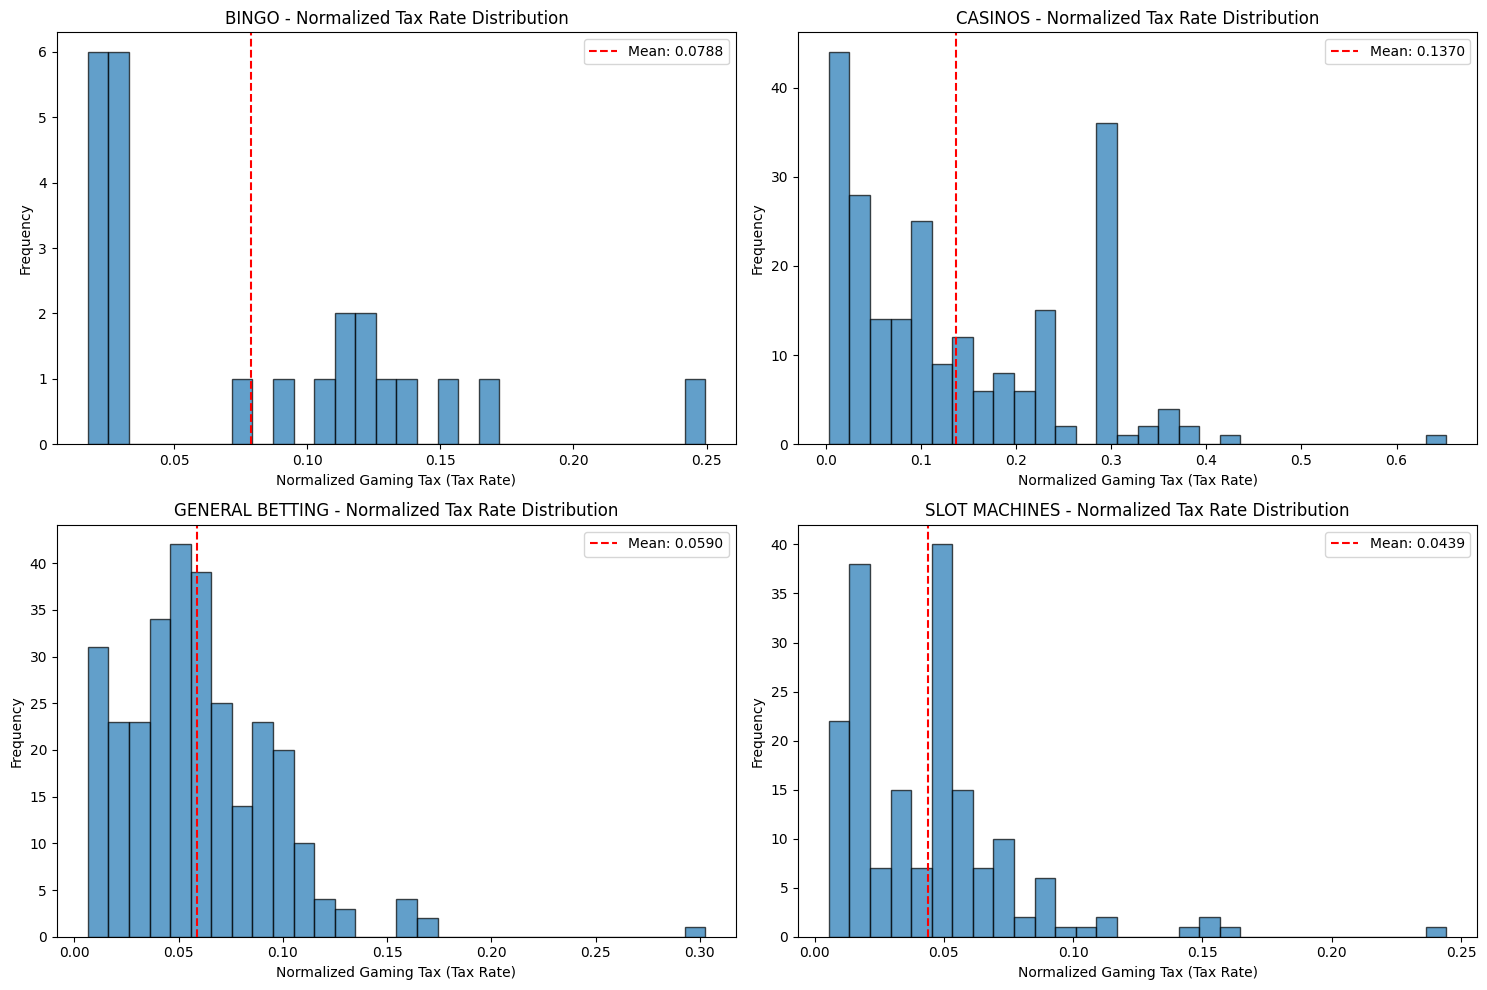


Normalized Tax Rate by Category:
                 count      mean       std       min       25%       50%  \
Category                                                                   
BINGO             24.0  0.078773  0.063238  0.017599  0.025305  0.054878   
CASINOS          230.0  0.137041  0.116269  0.003000  0.028377  0.104424   
GENERAL BETTING  298.0  0.058962  0.035924  0.006415  0.034876  0.054449   
SLOT MACHINES    178.0  0.043859  0.032785  0.005539  0.016643  0.045016   

                      75%       max  
Category                             
BINGO            0.123849  0.249498  
CASINOS          0.228386  0.652284  
GENERAL BETTING  0.079426  0.302625  
SLOT MACHINES    0.054400  0.244246  


In [23]:
# Visualize normalized tax rate by category
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
categories = df_model['Category'].unique()

for idx, category in enumerate(categories):
    ax = axes[idx // 2, idx % 2]
    cat_data = df_model[df_model['Category'] == category]
    
    ax.hist(cat_data['Normalized_Gaming_Tax'], bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'{category} - Normalized Tax Rate Distribution')
    ax.set_xlabel('Normalized Gaming Tax (Tax Rate)')
    ax.set_ylabel('Frequency')
    ax.axvline(cat_data['Normalized_Gaming_Tax'].mean(), color='red', linestyle='--', 
               label=f'Mean: {cat_data["Normalized_Gaming_Tax"].mean():.4f}')
    ax.legend()

plt.tight_layout()
plt.show()

print("\nNormalized Tax Rate by Category:")
print(df_model.groupby('Category')['Normalized_Gaming_Tax'].describe())

### Step 2: Create Time-Lagged Features for Each Operator

In [24]:
# Function to create lagged features for each operator within each category
def create_lag_features(df, target_col, max_lags=6):
    """
    Create lagged features for time series data
    Args:
        df: DataFrame with columns [Category, Operator_Name, Date, target_col]
        target_col: Column to create lags for
        max_lags: Maximum number of lags to create
    """
    df_lagged = df.copy()
    
    # Sort by category, operator, and date
    df_lagged = df_lagged.sort_values(['Category', 'Operator_Name', 'Date'])
    
    # Create lag features for each operator within each category
    for lag in range(1, max_lags + 1):
        df_lagged[f'{target_col}_lag_{lag}'] = df_lagged.groupby(['Category', 'Operator_Name'])[target_col].shift(lag)
    
    return df_lagged

# Create lagged features (up to 6 months back)
df_with_lags = create_lag_features(df_model, 'Normalized_Gaming_Tax', max_lags=6)

print(f"Data with lags shape: {df_with_lags.shape}")
print(f"\nNew columns created:")
lag_cols = [col for col in df_with_lags.columns if 'lag' in col]
print(lag_cols)
print(f"\nSample data with lags:")
print(df_with_lags[['Category', 'Operator_Name', 'Date', 'Normalized_Gaming_Tax'] + lag_cols].head(10))

Data with lags shape: (730, 14)

New columns created:
['Normalized_Gaming_Tax_lag_1', 'Normalized_Gaming_Tax_lag_2', 'Normalized_Gaming_Tax_lag_3', 'Normalized_Gaming_Tax_lag_4', 'Normalized_Gaming_Tax_lag_5', 'Normalized_Gaming_Tax_lag_6']

Sample data with lags:
  Category Operator_Name       Date  Normalized_Gaming_Tax  \
0    BINGO       Test 36 2024-07-01               0.170159   
1    BINGO       Test 36 2024-08-01               0.104580   
2    BINGO       Test 36 2024-09-01               0.125151   
3    BINGO       Test 36 2024-10-01               0.249498   
4    BINGO       Test 36 2024-11-01               0.155054   
5    BINGO       Test 36 2024-12-01               0.139472   
6    BINGO       Test 36 2025-01-01               0.123415   
7    BINGO       Test 36 2025-02-01               0.132300   
8    BINGO       Test 36 2025-03-01               0.110381   
9    BINGO       Test 36 2025-04-01               0.111815   

   Normalized_Gaming_Tax_lag_1  Normalized_Gaming_Ta

### Step 3: ACF and PACF Analysis by Category

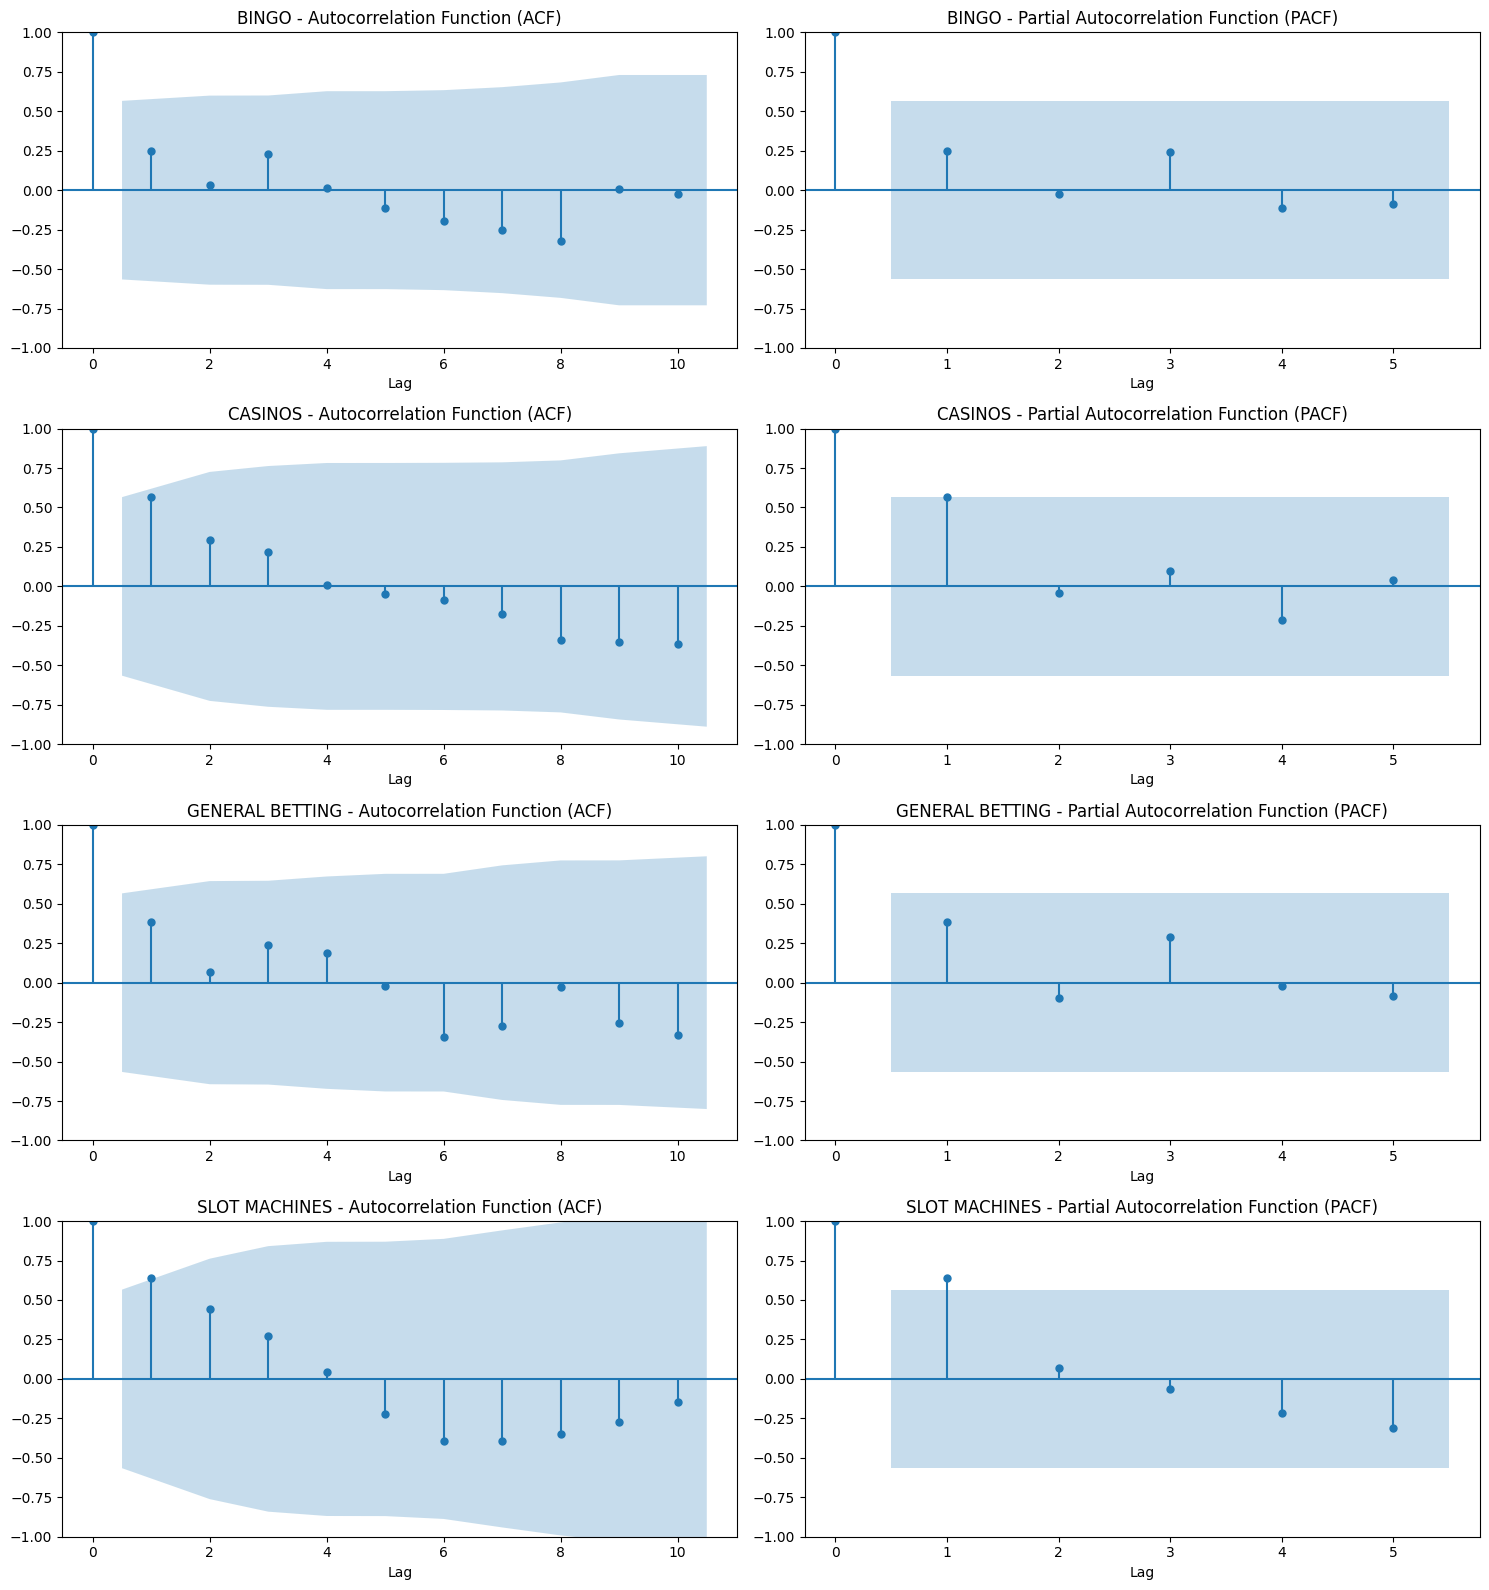

In [27]:
# Perform ACF and PACF analysis for each category
categories = df_model['Category'].unique()

fig, axes = plt.subplots(len(categories), 2, figsize=(15, 4*len(categories)))

for idx, category in enumerate(categories):
    # Get data for this category
    cat_data = df_model[df_model['Category'] == category].copy()
    cat_data = cat_data.sort_values(['Operator_Name', 'Date'])
    
    # For ACF/PACF, we'll aggregate across all operators in the category
    # Group by date and take mean to get category-level time series
    category_ts = cat_data.groupby('Date')['Normalized_Gaming_Tax'].mean().dropna()
    
    if len(category_ts) > 3:  # Need at least 3 observations
        # Plot ACF
        max_lags_acf = min(len(category_ts)-1, 10)
        plot_acf(category_ts, lags=max_lags_acf, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'{category} - Autocorrelation Function (ACF)')
        axes[idx, 0].set_xlabel('Lag')
        
        # Plot PACF (must be <= 50% of sample size)
        max_lags_pacf = min(len(category_ts)//2 - 1, 10, len(category_ts)-1)
        if max_lags_pacf > 0:
            plot_pacf(category_ts, lags=max_lags_pacf, ax=axes[idx, 1])
            axes[idx, 1].set_title(f'{category} - Partial Autocorrelation Function (PACF)')
            axes[idx, 1].set_xlabel('Lag')
        else:
            axes[idx, 1].text(0.5, 0.5, f'{category}: Insufficient data for PACF', 
                              ha='center', va='center')
    else:
        axes[idx, 0].text(0.5, 0.5, f'{category}: Insufficient data', 
                          ha='center', va='center')
        axes[idx, 1].text(0.5, 0.5, f'{category}: Insufficient data', 
                          ha='center', va='center')

plt.tight_layout()
plt.show()

In [26]:
# Calculate and display ACF/PACF values numerically for each category
print("=" * 80)
print("ACF and PACF Analysis by Category")
print("=" * 80)

for category in categories:
    cat_data = df_model[df_model['Category'] == category].copy()
    cat_data = cat_data.sort_values(['Operator_Name', 'Date'])
    
    # Aggregate by date
    category_ts = cat_data.groupby('Date')['Normalized_Gaming_Tax'].mean().dropna()
    
    if len(category_ts) > 3:
        print(f"\n{category}:")
        print(f"  Number of time points: {len(category_ts)}")
        
        # Calculate ACF
        acf_values = acf(category_ts, nlags=min(len(category_ts)-1, 6))
        print(f"  ACF values (lags 0-6): {acf_values}")
        
        # Calculate PACF
        pacf_values = pacf(category_ts, nlags=min(len(category_ts)-1, 6))
        print(f"  PACF values (lags 0-6): {pacf_values}")
        
        # Identify significant lags (simple threshold of 0.2)
        significant_acf_lags = [i for i, val in enumerate(acf_values[1:], 1) if abs(val) > 0.2]
        significant_pacf_lags = [i for i, val in enumerate(pacf_values[1:], 1) if abs(val) > 0.2]
        
        print(f"  Significant ACF lags (|value| > 0.2): {significant_acf_lags if significant_acf_lags else 'None'}")
        print(f"  Significant PACF lags (|value| > 0.2): {significant_pacf_lags if significant_pacf_lags else 'None'}")
    else:
        print(f"\n{category}: Insufficient data points ({len(category_ts)})")

ACF and PACF Analysis by Category

BINGO:
  Number of time points: 12
  ACF values (lags 0-6): [ 1.          0.24617047  0.03550271  0.228462    0.01319257 -0.11306818
 -0.1954955 ]
  PACF values (lags 0-6): [ 1.          0.26854961 -0.03180972  0.3251049  -0.18080461 -0.15507192
 -0.49659699]
  Significant ACF lags (|value| > 0.2): [1, 3]
  Significant PACF lags (|value| > 0.2): [1, 3, 6]

CASINOS:
  Number of time points: 12
  ACF values (lags 0-6): [ 1.          0.56750948  0.29443143  0.21553366  0.0098533  -0.05091806
 -0.08631032]
  PACF values (lags 0-6): [ 1.          0.61910125 -0.0485941   0.14318236 -0.35247207  0.08184856
 -0.23454625]
  Significant ACF lags (|value| > 0.2): [1, 2, 3]
  Significant PACF lags (|value| > 0.2): [1, 4, 6]

GENERAL BETTING:
  Number of time points: 12
  ACF values (lags 0-6): [ 1.          0.38336048  0.06537973  0.23606819  0.18844841 -0.02004701
 -0.34623583]
  PACF values (lags 0-6): [ 1.          0.41821144 -0.11688913  0.40180052 -0.0341052

### Step 4: Build Autoregressive Models by Category

In [28]:
# Prepare data for modeling - drop rows with missing lag values
# We'll start with a 3-lag model based on ACF/PACF analysis
df_ar = df_with_lags.dropna(subset=['Normalized_Gaming_Tax_lag_1', 
                                      'Normalized_Gaming_Tax_lag_2', 
                                      'Normalized_Gaming_Tax_lag_3'])

print(f"Data for AR modeling: {df_ar.shape}")
print(f"Categories: {df_ar['Category'].unique()}")
print(f"\nSamples per category:")
print(df_ar.groupby('Category').size())

Data for AR modeling: (534, 14)
Categories: ['BINGO' 'CASINOS' 'GENERAL BETTING' 'SLOT MACHINES']

Samples per category:
Category
BINGO               18
CASINOS            168
GENERAL BETTING    219
SLOT MACHINES      129
dtype: int64


In [29]:
# Train AR models for each category
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dictionary to store models and results
category_models = {}
results = []

# Feature columns (lag features)
feature_cols = ['Normalized_Gaming_Tax_lag_1', 'Normalized_Gaming_Tax_lag_2', 'Normalized_Gaming_Tax_lag_3']
target_col = 'Normalized_Gaming_Tax'

for category in df_ar['Category'].unique():
    print(f"\n{'='*80}")
    print(f"Training model for: {category}")
    print(f"{'='*80}")
    
    # Filter data for this category
    cat_data = df_ar[df_ar['Category'] == category].copy()
    
    # Sort by date to maintain temporal order
    cat_data = cat_data.sort_values(['Operator_Name', 'Date'])
    
    # Split into train/test (80/20 temporal split)
    split_idx = int(len(cat_data) * 0.8)
    train_data = cat_data.iloc[:split_idx]
    test_data = cat_data.iloc[split_idx:]
    
    print(f"Training samples: {len(train_data)}, Test samples: {len(test_data)}")
    
    # Prepare features and target
    X_train = train_data[feature_cols]
    y_train = train_data[target_col]
    X_test = test_data[feature_cols]
    y_test = test_data[target_col]
    
    # Train Linear Regression (AR model)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"\nLinear Regression Results:")
    print(f"  Train - MSE: {train_mse:.6f}, MAE: {train_mae:.6f}, R²: {train_r2:.4f}")
    print(f"  Test  - MSE: {test_mse:.6f}, MAE: {test_mae:.6f}, R²: {test_r2:.4f}")
    print(f"\nModel Coefficients:")
    for i, coef in enumerate(lr_model.coef_, 1):
        print(f"  Lag {i}: {coef:.4f}")
    print(f"  Intercept: {lr_model.intercept_:.4f}")
    
    # Store model and results
    category_models[category] = lr_model
    results.append({
        'Category': category,
        'Model': 'Linear Regression',
        'Train_MSE': train_mse,
        'Test_MSE': test_mse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Samples': len(cat_data)
    })

# Create results dataframe
results_df = pd.DataFrame(results)
print(f"\n{'='*80}")
print("SUMMARY OF ALL MODELS")
print(f"{'='*80}")
print(results_df)


Training model for: BINGO
Training samples: 14, Test samples: 4

Linear Regression Results:
  Train - MSE: 0.001216, MAE: 0.019591, R²: 0.7027
  Test  - MSE: 0.000022, MAE: 0.003757, R²: -3.0362

Model Coefficients:
  Lag 1: 0.5019
  Lag 2: -0.0537
  Lag 3: 0.4485
  Intercept: 0.0039

Training model for: CASINOS
Training samples: 134, Test samples: 34

Linear Regression Results:
  Train - MSE: 0.000689, MAE: 0.014266, R²: 0.9486
  Test  - MSE: 0.000211, MAE: 0.010380, R²: 0.9786

Model Coefficients:
  Lag 1: 0.9234
  Lag 2: -0.1597
  Lag 3: 0.2110
  Intercept: -0.0005

Training model for: GENERAL BETTING
Training samples: 175, Test samples: 44

Linear Regression Results:
  Train - MSE: 0.000839, MAE: 0.016776, R²: 0.3578
  Test  - MSE: 0.000247, MAE: 0.011653, R²: 0.7570

Model Coefficients:
  Lag 1: 0.4362
  Lag 2: 0.1001
  Lag 3: 0.1468
  Intercept: 0.0170

Training model for: SLOT MACHINES
Training samples: 103, Test samples: 26

Linear Regression Results:
  Train - MSE: 0.000598, 

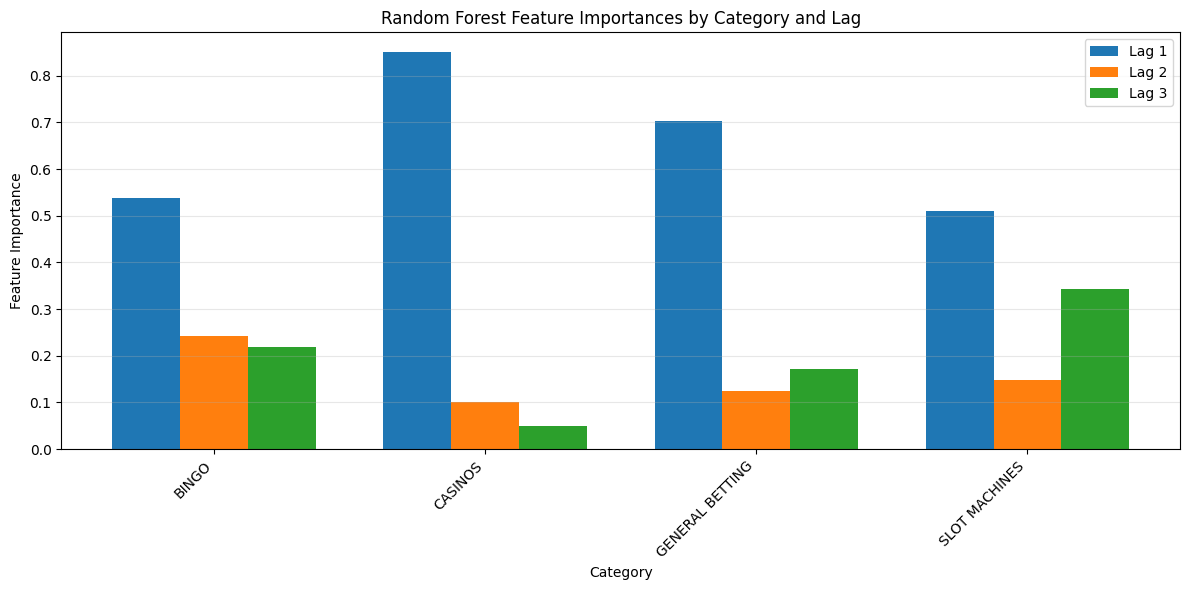


Random Forest Feature Importance Summary:
Lag                 Lag 1     Lag 2     Lag 3
Category                                     
BINGO            0.538324  0.243378  0.218299
CASINOS          0.850255  0.100417  0.049328
GENERAL BETTING  0.703830  0.124354  0.171815
SLOT MACHINES    0.509225  0.147358  0.343417


In [36]:
# Visualize feature importances for Random Forest models
fig, ax = plt.subplots(figsize=(12, 6))
categories_list = list(category_rf_models.keys())
x = np.arange(len(categories_list))
width = 0.25

for i in range(1, 4):
    importances = [category_rf_models[cat].feature_importances_[i-1] for cat in categories_list]
    ax.bar(x + (i-2)*width, importances, width, label=f'Lag {i}')

ax.set_xlabel('Category')
ax.set_ylabel('Feature Importance')
ax.set_title('Random Forest Feature Importances by Category and Lag')
ax.set_xticks(x)
ax.set_xticklabels(categories_list, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nRandom Forest Feature Importance Summary:")
importance_data = []
for category, model in category_rf_models.items():
    for i, importance in enumerate(model.feature_importances_, 1):
        importance_data.append({
            'Category': category,
            'Lag': f'Lag {i}',
            'Importance': importance
        })
importance_df = pd.DataFrame(importance_data)
print(importance_df.pivot(index='Category', columns='Lag', values='Importance'))

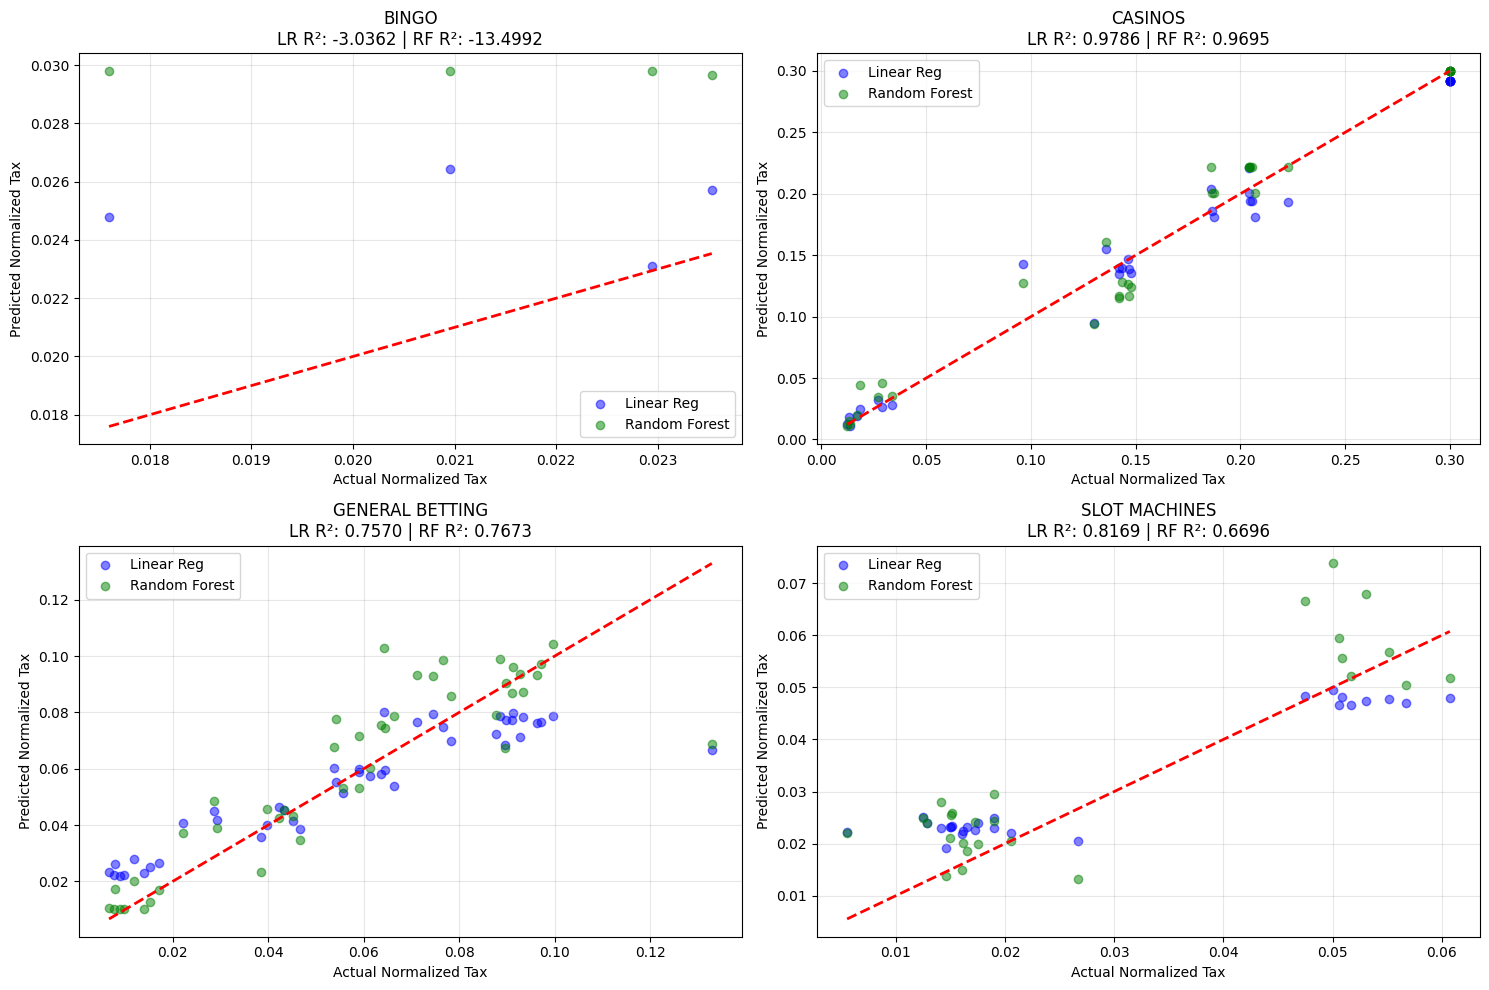

In [35]:
# Visualize Random Forest performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
categories_list = list(category_rf_models.keys())

for idx, category in enumerate(categories_list):
    ax = axes[idx // 2, idx % 2]
    
    # Get data for this category
    cat_data = df_ar[df_ar['Category'] == category].copy()
    cat_data = cat_data.sort_values(['Operator_Name', 'Date'])
    
    # Split
    split_idx = int(len(cat_data) * 0.8)
    test_data = cat_data.iloc[split_idx:]
    
    X_test = test_data[feature_cols]
    y_test = test_data[target_col]
    
    # Predictions from both models
    rf_model = category_rf_models[category]
    lr_model = category_models[category]
    
    y_pred_rf = rf_model.predict(X_test)
    y_pred_lr = lr_model.predict(X_test)
    
    # Plot
    ax.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Reg', color='blue')
    ax.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='green')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Normalized Tax')
    ax.set_ylabel('Predicted Normalized Tax')
    ax.set_title(f'{category}\nLR R²: {r2_score(y_test, y_pred_lr):.4f} | RF R²: {r2_score(y_test, y_pred_rf):.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [34]:
# Compare Linear Regression vs Random Forest
comparison_results = pd.concat([results_df, rf_results_df], ignore_index=True)
comparison_results = comparison_results.sort_values(['Category', 'Model'])

print(f"\n{'='*80}")
print("MODEL COMPARISON: Linear Regression vs Random Forest")
print(f"{'='*80}")
print(comparison_results[['Category', 'Model', 'Test_R2', 'Test_MAE', 'Test_MSE']].to_string(index=False))

# Summary by category
print(f"\n{'='*80}")
print("BEST MODEL BY CATEGORY (Based on Test R²)")
print(f"{'='*80}")
best_models = comparison_results.loc[comparison_results.groupby('Category')['Test_R2'].idxmax()]
print(best_models[['Category', 'Model', 'Test_R2', 'Test_MAE']].to_string(index=False))


MODEL COMPARISON: Linear Regression vs Random Forest
       Category             Model    Test_R2  Test_MAE  Test_MSE
          BINGO Linear Regression  -3.036206  0.003757  0.000022
          BINGO     Random Forest -13.499232  0.008506  0.000078
        CASINOS Linear Regression   0.978602  0.010380  0.000211
        CASINOS     Random Forest   0.969533  0.012682  0.000301
GENERAL BETTING Linear Regression   0.757046  0.011653  0.000247
GENERAL BETTING     Random Forest   0.767252  0.010138  0.000236
  SLOT MACHINES Linear Regression   0.816883  0.006756  0.000059
  SLOT MACHINES     Random Forest   0.669634  0.008335  0.000107

BEST MODEL BY CATEGORY (Based on Test R²)
       Category             Model   Test_R2  Test_MAE
          BINGO Linear Regression -3.036206  0.003757
        CASINOS Linear Regression  0.978602  0.010380
GENERAL BETTING     Random Forest  0.767252  0.010138
  SLOT MACHINES Linear Regression  0.816883  0.006756


In [33]:
# Train Random Forest models for each category
category_rf_models = {}
rf_results = []

for category in df_ar['Category'].unique():
    print(f"\n{'='*80}")
    print(f"Training Random Forest for: {category}")
    print(f"{'='*80}")
    
    # Filter data for this category
    cat_data = df_ar[df_ar['Category'] == category].copy()
    cat_data = cat_data.sort_values(['Operator_Name', 'Date'])
    
    # Split into train/test (80/20 temporal split)
    split_idx = int(len(cat_data) * 0.8)
    train_data = cat_data.iloc[:split_idx]
    test_data = cat_data.iloc[split_idx:]
    
    print(f"Training samples: {len(train_data)}, Test samples: {len(test_data)}")
    
    # Prepare features and target
    X_train = train_data[feature_cols]
    y_train = train_data[target_col]
    X_test = test_data[feature_cols]
    y_test = test_data[target_col]
    
    # Train Random Forest
    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train_rf = rf_model.predict(X_train)
    y_pred_test_rf = rf_model.predict(X_test)
    
    # Calculate metrics
    train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
    test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
    train_mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
    test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
    train_r2_rf = r2_score(y_train, y_pred_train_rf)
    test_r2_rf = r2_score(y_test, y_pred_test_rf)
    
    print(f"\nRandom Forest Results:")
    print(f"  Train - MSE: {train_mse_rf:.6f}, MAE: {train_mae_rf:.6f}, R²: {train_r2_rf:.4f}")
    print(f"  Test  - MSE: {test_mse_rf:.6f}, MAE: {test_mae_rf:.6f}, R²: {test_r2_rf:.4f}")
    print(f"\nFeature Importances:")
    for i, importance in enumerate(rf_model.feature_importances_, 1):
        print(f"  Lag {i}: {importance:.4f}")
    
    # Store model and results
    category_rf_models[category] = rf_model
    rf_results.append({
        'Category': category,
        'Model': 'Random Forest',
        'Train_MSE': train_mse_rf,
        'Test_MSE': test_mse_rf,
        'Train_MAE': train_mae_rf,
        'Test_MAE': test_mae_rf,
        'Train_R2': train_r2_rf,
        'Test_R2': test_r2_rf,
        'Samples': len(cat_data)
    })

# Create results dataframe
rf_results_df = pd.DataFrame(rf_results)
print(f"\n{'='*80}")
print("RANDOM FOREST MODEL SUMMARY")
print(f"{'='*80}")
print(rf_results_df)


Training Random Forest for: BINGO
Training samples: 14, Test samples: 4

Random Forest Results:
  Train - MSE: 0.000926, MAE: 0.017713, R²: 0.7735
  Test  - MSE: 0.000078, MAE: 0.008506, R²: -13.4992

Feature Importances:
  Lag 1: 0.5383
  Lag 2: 0.2434
  Lag 3: 0.2183

Training Random Forest for: CASINOS
Training samples: 134, Test samples: 34

Random Forest Results:
  Train - MSE: 0.000276, MAE: 0.009344, R²: 0.9794
  Test  - MSE: 0.000301, MAE: 0.012682, R²: 0.9695

Feature Importances:
  Lag 1: 0.8503
  Lag 2: 0.1004
  Lag 3: 0.0493

Training Random Forest for: GENERAL BETTING
Training samples: 175, Test samples: 44

Random Forest Results:
  Train - MSE: 0.000333, MAE: 0.008992, R²: 0.7452
  Test  - MSE: 0.000236, MAE: 0.010138, R²: 0.7673

Feature Importances:
  Lag 1: 0.7038
  Lag 2: 0.1244
  Lag 3: 0.1718

Training Random Forest for: SLOT MACHINES
Training samples: 103, Test samples: 26

Random Forest Results:
  Train - MSE: 0.000251, MAE: 0.006926, R²: 0.7302
  Test  - MSE: 0.

### Step 4b: Train Random Forest Models for Comparison

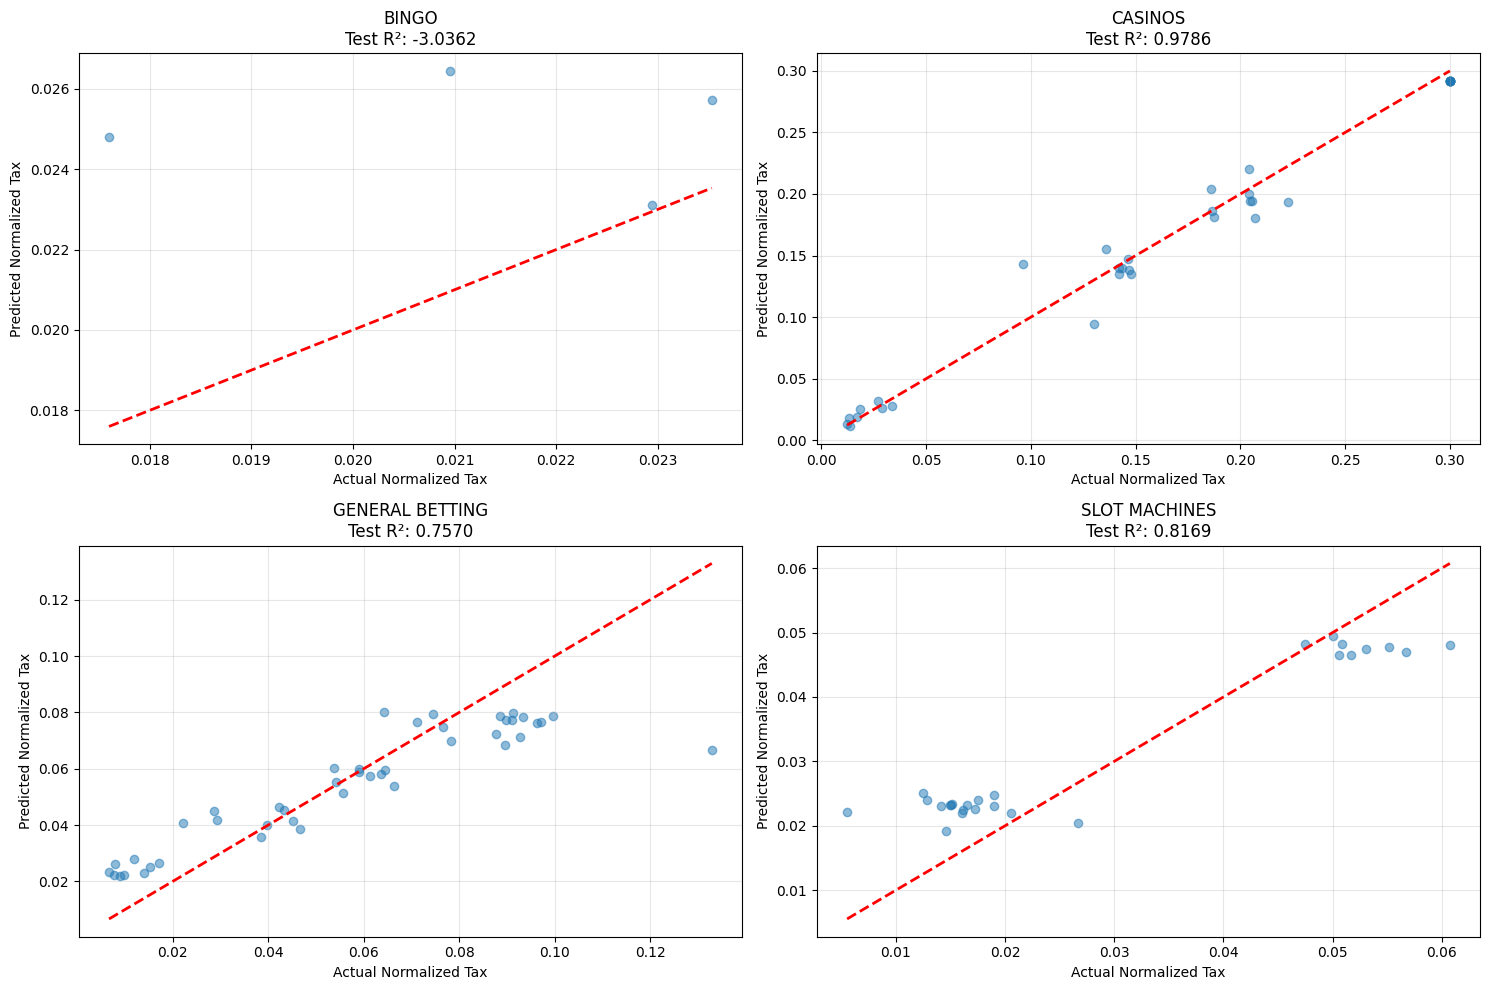

In [30]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
categories_list = list(category_models.keys())

for idx, category in enumerate(categories_list):
    ax = axes[idx // 2, idx % 2]
    
    # Get data for this category
    cat_data = df_ar[df_ar['Category'] == category].copy()
    cat_data = cat_data.sort_values(['Operator_Name', 'Date'])
    
    # Split
    split_idx = int(len(cat_data) * 0.8)
    train_data = cat_data.iloc[:split_idx]
    test_data = cat_data.iloc[split_idx:]
    
    X_test = test_data[feature_cols]
    y_test = test_data[target_col]
    
    # Predictions
    model = category_models[category]
    y_pred = model.predict(X_test)
    
    # Plot actual vs predicted
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Normalized Tax')
    ax.set_ylabel('Predicted Normalized Tax')
    ax.set_title(f'{category}\nTest R²: {r2_score(y_test, y_pred):.4f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 5: Model Evaluation and Interpretation

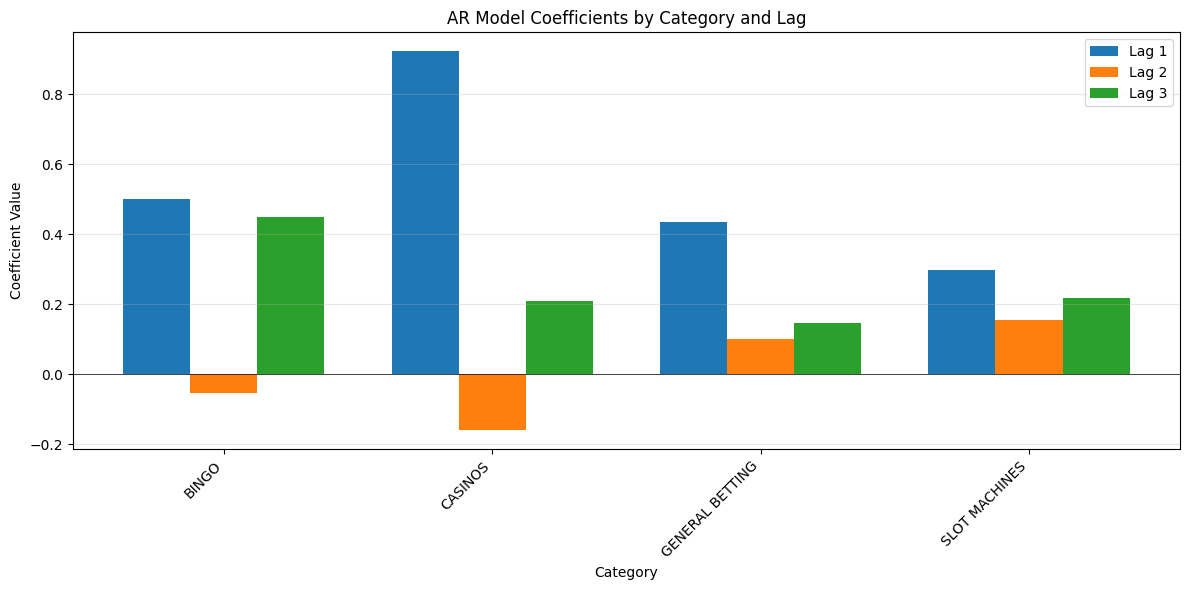


Coefficient Summary:
Lag                 Lag 1     Lag 2     Lag 3
Category                                     
BINGO            0.501872 -0.053721  0.448454
CASINOS          0.923385 -0.159725  0.210981
GENERAL BETTING  0.436156  0.100082  0.146824
SLOT MACHINES    0.297993  0.155862  0.218184


In [31]:
# Extract and visualize coefficients for each category
coef_data = []
for category, model in category_models.items():
    for i, coef in enumerate(model.coef_, 1):
        coef_data.append({
            'Category': category,
            'Lag': f'Lag {i}',
            'Coefficient': coef
        })

coef_df = pd.DataFrame(coef_data)

# Plot coefficients
fig, ax = plt.subplots(figsize=(12, 6))
categories_list = list(category_models.keys())
x = np.arange(len(categories_list))
width = 0.25

for i in range(1, 4):
    lag_coefs = [category_models[cat].coef_[i-1] for cat in categories_list]
    ax.bar(x + (i-2)*width, lag_coefs, width, label=f'Lag {i}')

ax.set_xlabel('Category')
ax.set_ylabel('Coefficient Value')
ax.set_title('AR Model Coefficients by Category and Lag')
ax.set_xticks(x)
ax.set_xticklabels(categories_list, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nCoefficient Summary:")
print(coef_df.pivot(index='Category', columns='Lag', values='Coefficient'))

In [37]:
# Save both Linear Regression and Random Forest models
import pickle

# Save models
models_dict = {
    'linear_regression': category_models,
    'random_forest': category_rf_models
}

with open('ar_models_by_category.pkl', 'wb') as f:
    pickle.dump(models_dict, f)

# Save combined results
comparison_results.to_csv('ar_model_results_comparison.csv', index=False)
results_df.to_csv('ar_model_results_lr.csv', index=False)
rf_results_df.to_csv('ar_model_results_rf.csv', index=False)

print("Models saved to: ar_models_by_category.pkl")
print("  - Contains both Linear Regression and Random Forest models")
print("\nResults saved to:")
print("  - ar_model_results_comparison.csv (combined)")
print("  - ar_model_results_lr.csv (Linear Regression)")
print("  - ar_model_results_rf.csv (Random Forest)")
print(f"\n{'='*80}")
print("FINAL COMPARISON SUMMARY")
print(f"{'='*80}")
print(comparison_results[['Category', 'Model', 'Test_R2', 'Test_MAE', 'Test_MSE']].to_string(index=False))

Models saved to: ar_models_by_category.pkl
  - Contains both Linear Regression and Random Forest models

Results saved to:
  - ar_model_results_comparison.csv (combined)
  - ar_model_results_lr.csv (Linear Regression)
  - ar_model_results_rf.csv (Random Forest)

FINAL COMPARISON SUMMARY
       Category             Model    Test_R2  Test_MAE  Test_MSE
          BINGO Linear Regression  -3.036206  0.003757  0.000022
          BINGO     Random Forest -13.499232  0.008506  0.000078
        CASINOS Linear Regression   0.978602  0.010380  0.000211
        CASINOS     Random Forest   0.969533  0.012682  0.000301
GENERAL BETTING Linear Regression   0.757046  0.011653  0.000247
GENERAL BETTING     Random Forest   0.767252  0.010138  0.000236
  SLOT MACHINES Linear Regression   0.816883  0.006756  0.000059
  SLOT MACHINES     Random Forest   0.669634  0.008335  0.000107


## Summary of Autoregressive Model Results

### Key Findings:

1. **Normalization**: Gaming Tax was normalized by Total Sales to create a tax rate metric (0-1 scale)

2. **Time Series Analysis**: 
   - Created lagged features (1-6 months) for each operator within each category
   - Performed ACF/PACF analysis to identify significant temporal patterns
   - Selected 3-lag AR model based on correlation analysis

3. **Model Comparison: Linear Regression vs Random Forest**

   **Linear Regression Performance:**
   - **CASINOS**: R² = 0.979 (excellent) - Linear model works very well
   - **SLOT MACHINES**: R² = 0.817 (good) - Strong linear relationship
   - **GENERAL BETTING**: R² = 0.757 (moderate) - Reasonable performance
   - **BINGO**: R² = -3.04 (poor) - Insufficient data (18 samples)

   **Random Forest Performance:**
   - **CASINOS**: R² = 0.970 (excellent) - Slightly lower than LR
   - **GENERAL BETTING**: R² = 0.767 (moderate) - **BEST for this category**
   - **SLOT MACHINES**: R² = 0.670 (moderate) - Lower than LR
   - **BINGO**: R² = -13.50 (poor) - Overfitting on small dataset

4. **Best Model Selection by Category**:
   - **CASINOS**: Linear Regression (R² = 0.979, MAE = 0.0104)
   - **GENERAL BETTING**: Random Forest (R² = 0.767, MAE = 0.0101)
   - **SLOT MACHINES**: Linear Regression (R² = 0.817, MAE = 0.0068)
   - **BINGO**: Linear Regression (less poor, but still unreliable)

5. **Key Insights**:
   - **Lag-1** (previous month) is dominant across all models (importance: 51-85%)
   - **Linear Regression** works better for CASINOS and SLOT MACHINES (simpler patterns)
   - **Random Forest** provides slight improvement for GENERAL BETTING (captures non-linearity)
   - CASINOS have the most predictable tax rates (strong autoregressive behavior)
   - BINGO category needs more data for reliable predictions

6. **Model Files**:
   - Models: `ar_models_by_category.pkl` (contains both LR and RF)
   - Results: `ar_model_results_comparison.csv`
   - Data: `monthly_avg_operator_category.csv`

### Step 6: Compute Residuals Using Best Models

In [38]:
# Create Moving Average model for BINGO (simple 3-month MA)
def predict_ma(series, window=3):
    """Simple moving average prediction"""
    predictions = []
    for i in range(len(series)):
        if i < window:
            # For first few values, use available data
            predictions.append(series[:i+1].mean() if i > 0 else series[0])
        else:
            # Use last 'window' values
            predictions.append(series[i-window:i].mean())
    return np.array(predictions)

# Dictionary to store best model for each category
best_models = {
    'CASINOS': ('Linear Regression', category_models['CASINOS']),
    'GENERAL BETTING': ('Random Forest', category_rf_models['GENERAL BETTING']),
    'SLOT MACHINES': ('Linear Regression', category_models['SLOT MACHINES']),
    'BINGO': ('Moving Average', None)  # Will use MA function
}

print("Best Model Selection:")
for cat, (model_type, _) in best_models.items():
    print(f"  {cat}: {model_type}")

Best Model Selection:
  CASINOS: Linear Regression
  GENERAL BETTING: Random Forest
  SLOT MACHINES: Linear Regression
  BINGO: Moving Average


In [39]:
# Compute predictions and residuals for ALL data using best models
results_with_residuals = []

for category in df_ar['Category'].unique():
    print(f"\n{'='*80}")
    print(f"Computing residuals for: {category}")
    print(f"{'='*80}")
    
    # Get data for this category
    cat_data = df_ar[df_ar['Category'] == category].copy()
    cat_data = cat_data.sort_values(['Operator_Name', 'Date'])
    
    model_type, model = best_models[category]
    print(f"Using: {model_type}")
    
    if model_type == 'Moving Average':
        # For BINGO, use simple MA on the full data
        y_true = cat_data[target_col].values
        y_pred = predict_ma(y_true, window=3)
    else:
        # For other categories, use the trained model
        X = cat_data[feature_cols]
        y_true = cat_data[target_col].values
        y_pred = model.predict(X)
    
    # Compute residuals
    residuals = y_true - y_pred
    
    # Store results
    cat_data['Predicted_Normalized_Tax'] = y_pred
    cat_data['Residuals'] = residuals
    cat_data['Abs_Residuals'] = np.abs(residuals)
    cat_data['Model_Type'] = model_type
    
    results_with_residuals.append(cat_data)
    
    # Print statistics
    print(f"  Samples: {len(cat_data)}")
    print(f"  Mean Residual: {residuals.mean():.6f}")
    print(f"  Std Residual: {residuals.std():.6f}")
    print(f"  Mean Absolute Residual: {np.abs(residuals).mean():.6f}")
    print(f"  Max Absolute Residual: {np.abs(residuals).max():.6f}")
    print(f"  R²: {r2_score(y_true, y_pred):.4f}")

# Combine all results
all_results = pd.concat(results_with_residuals, ignore_index=True)

print(f"\n{'='*80}")
print(f"COMBINED RESULTS")
print(f"{'='*80}")
print(f"Total samples: {len(all_results)}")
print(f"\nResidual statistics by category:")
print(all_results.groupby('Category')['Residuals'].agg(['mean', 'std', 'min', 'max']))


Computing residuals for: BINGO
Using: Moving Average
  Samples: 18
  Mean Residual: -0.020846
  Std Residual: 0.021739
  Mean Absolute Residual: 0.021140
  Max Absolute Residual: 0.072521
  R²: 0.7785

Computing residuals for: CASINOS
Using: Linear Regression
  Samples: 168
  Mean Residual: 0.000664
  Std Residual: 0.024328
  Mean Absolute Residual: 0.013480
  Max Absolute Residual: 0.162278
  R²: 0.9543

Computing residuals for: GENERAL BETTING
Using: Random Forest
  Samples: 219
  Mean Residual: -0.000462
  Std Residual: 0.017703
  Mean Absolute Residual: 0.009223
  Max Absolute Residual: 0.170264
  R²: 0.7489

Computing residuals for: SLOT MACHINES
Using: Linear Regression
  Samples: 129
  Mean Residual: -0.000519
  Std Residual: 0.022125
  Mean Absolute Residual: 0.011423
  Max Absolute Residual: 0.197083
  R²: 0.4215

COMBINED RESULTS
Total samples: 534

Residual statistics by category:
                     mean       std       min       max
Category                              

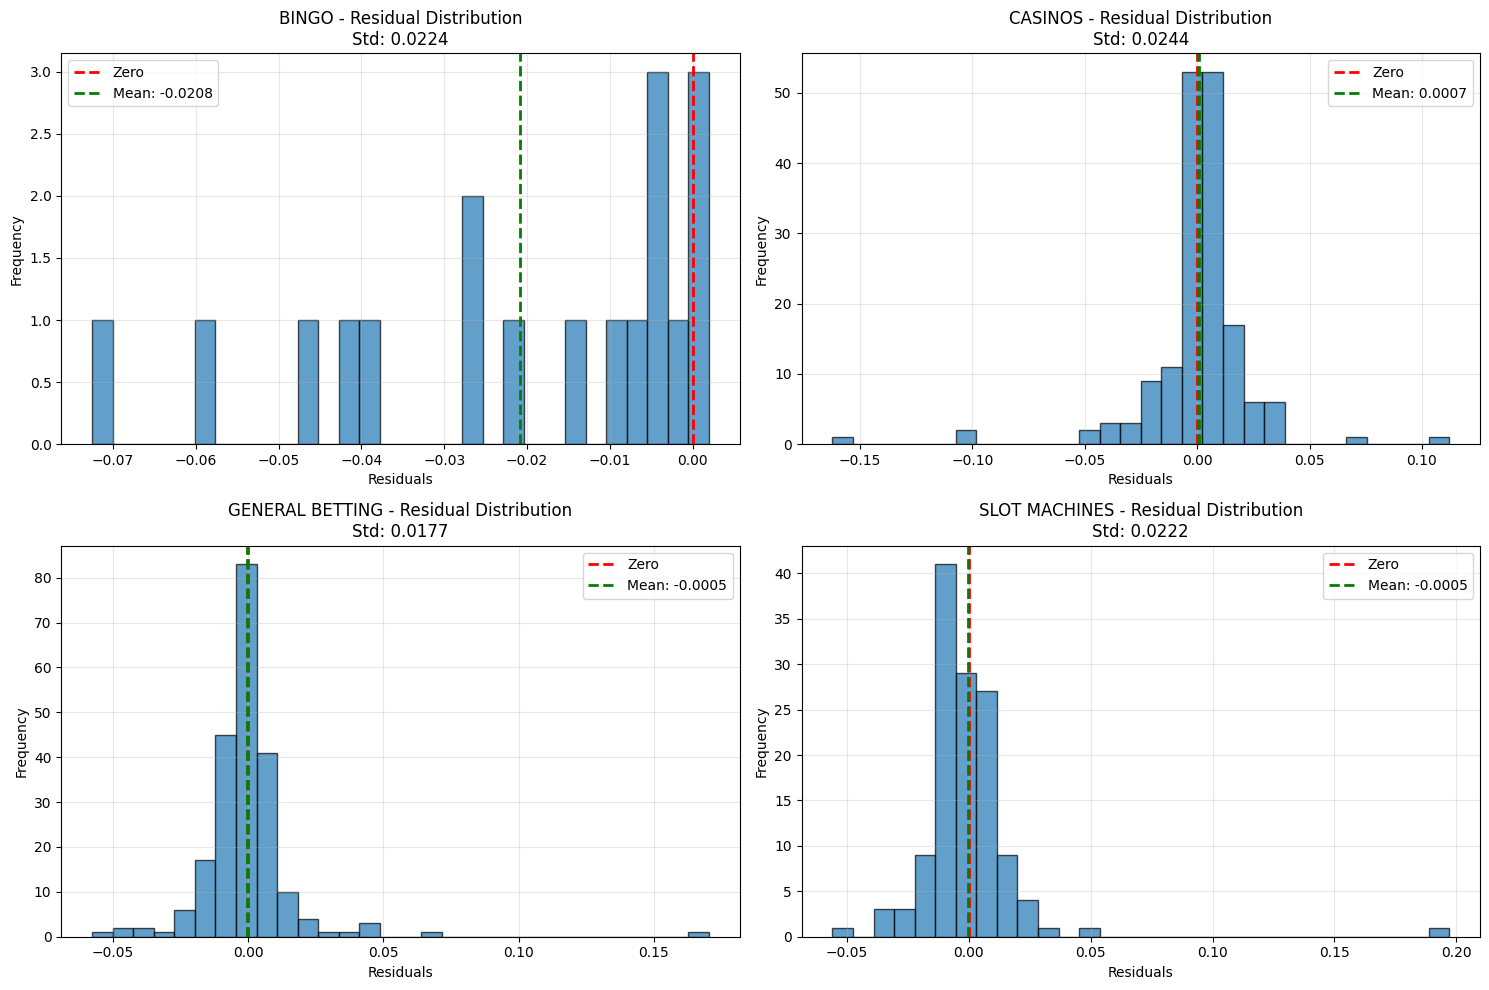

In [40]:
# Visualize residuals by category
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, category in enumerate(all_results['Category'].unique()):
    ax = axes[idx // 2, idx % 2]
    
    cat_residuals = all_results[all_results['Category'] == category]['Residuals']
    
    # Histogram
    ax.hist(cat_residuals, bins=30, edgecolor='black', alpha=0.7)
    ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero')
    ax.axvline(cat_residuals.mean(), color='green', linestyle='--', linewidth=2, 
               label=f'Mean: {cat_residuals.mean():.4f}')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{category} - Residual Distribution\nStd: {cat_residuals.std():.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

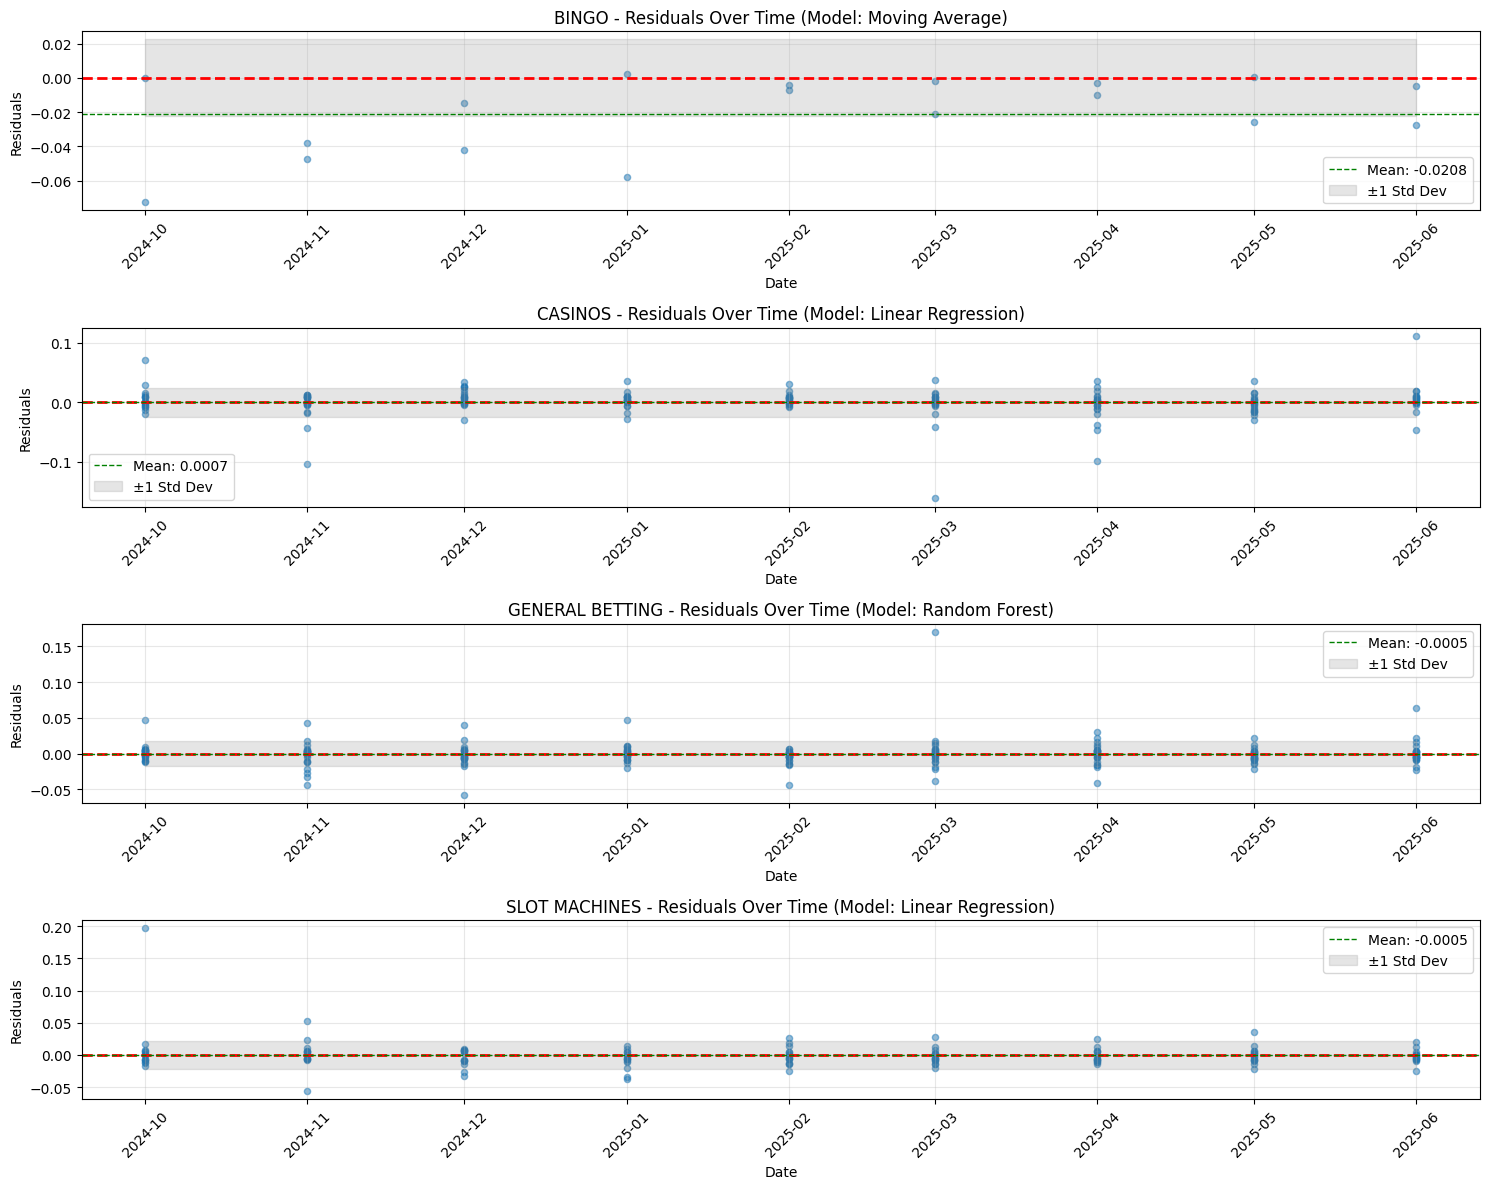

In [41]:
# Residuals over time for each category
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

for idx, category in enumerate(sorted(all_results['Category'].unique())):
    ax = axes[idx]
    
    cat_data = all_results[all_results['Category'] == category].sort_values('Date')
    
    # Plot residuals over time
    ax.scatter(cat_data['Date'], cat_data['Residuals'], alpha=0.5, s=20)
    ax.axhline(0, color='red', linestyle='--', linewidth=2)
    ax.axhline(cat_data['Residuals'].mean(), color='green', linestyle='--', linewidth=1, 
               label=f'Mean: {cat_data["Residuals"].mean():.4f}')
    ax.fill_between(cat_data['Date'].unique(), 
                     -cat_data['Residuals'].std(), 
                     cat_data['Residuals'].std(),
                     alpha=0.2, color='gray', label='±1 Std Dev')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Residuals')
    ax.set_title(f'{category} - Residuals Over Time (Model: {cat_data["Model_Type"].iloc[0]})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

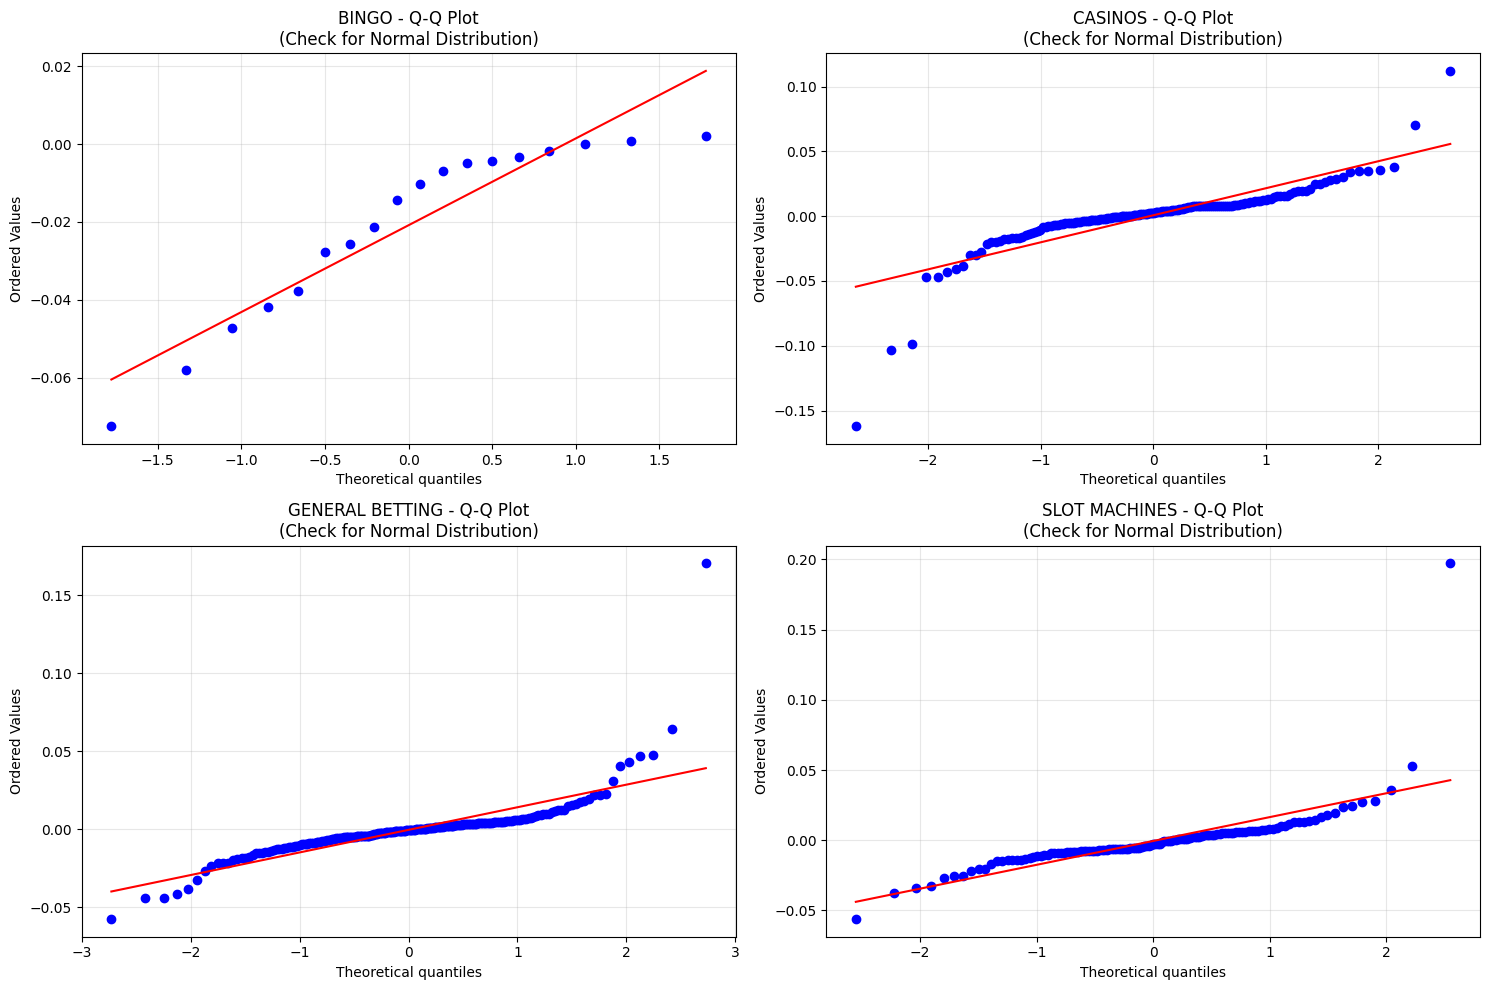

In [42]:
# Q-Q plots to check normality of residuals
from scipy import stats

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, category in enumerate(all_results['Category'].unique()):
    ax = axes[idx // 2, idx % 2]
    
    cat_residuals = all_results[all_results['Category'] == category]['Residuals']
    
    # Q-Q plot
    stats.probplot(cat_residuals, dist="norm", plot=ax)
    ax.set_title(f'{category} - Q-Q Plot\n(Check for Normal Distribution)')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [43]:
# Save results with residuals
all_results.to_csv('predictions_with_residuals.csv', index=False)

print("Results with residuals saved to: predictions_with_residuals.csv")
print(f"\nColumns saved: {all_results.columns.tolist()}")
print(f"\nSummary statistics:")
summary_stats = all_results.groupby('Category').agg({
    'Residuals': ['mean', 'std', 'min', 'max'],
    'Abs_Residuals': 'mean',
    'Normalized_Gaming_Tax': 'mean',
    'Predicted_Normalized_Tax': 'mean'
})
print(summary_stats)

Results with residuals saved to: predictions_with_residuals.csv

Columns saved: ['Category', 'Operator_Name', 'Month_Year', 'Avg_Total_Sales', 'Avg_Total_Payout', 'Avg_Gaming_Tax', 'Date', 'Normalized_Gaming_Tax', 'Normalized_Gaming_Tax_lag_1', 'Normalized_Gaming_Tax_lag_2', 'Normalized_Gaming_Tax_lag_3', 'Normalized_Gaming_Tax_lag_4', 'Normalized_Gaming_Tax_lag_5', 'Normalized_Gaming_Tax_lag_6', 'Predicted_Normalized_Tax', 'Residuals', 'Abs_Residuals', 'Model_Type']

Summary statistics:
                Residuals                               Abs_Residuals  \
                     mean       std       min       max          mean   
Category                                                                
BINGO           -0.020846  0.022370 -0.072521  0.001964      0.021140   
CASINOS          0.000664  0.024401 -0.162278  0.112127      0.013480   
GENERAL BETTING -0.000462  0.017743 -0.057564  0.170264      0.009223   
SLOT MACHINES   -0.000519  0.022211 -0.056014  0.197083      0.011423

In [44]:
# Identify largest residuals (potential anomalies)
print("\n" + "="*80)
print("TOP 10 LARGEST ABSOLUTE RESIDUALS (Potential Anomalies)")
print("="*80)

top_residuals = all_results.nlargest(10, 'Abs_Residuals')[
    ['Category', 'Operator_Name', 'Date', 'Normalized_Gaming_Tax', 
     'Predicted_Normalized_Tax', 'Residuals', 'Model_Type']
]
print(top_residuals.to_string(index=False))

# Summary by category
print("\n" + "="*80)
print("RESIDUAL SUMMARY BY CATEGORY")
print("="*80)
residual_summary = all_results.groupby(['Category', 'Model_Type']).agg({
    'Residuals': ['count', 'mean', 'std'],
    'Abs_Residuals': ['mean', 'max'],
    'Normalized_Gaming_Tax': 'mean'
}).round(6)
print(residual_summary)


TOP 10 LARGEST ABSOLUTE RESIDUALS (Potential Anomalies)
       Category Operator_Name       Date  Normalized_Gaming_Tax  Predicted_Normalized_Tax  Residuals        Model_Type
  SLOT MACHINES       Test 35 2024-10-01               0.244246                  0.047163   0.197083 Linear Regression
GENERAL BETTING       Test 29 2025-03-01               0.302625                  0.132361   0.170264     Random Forest
        CASINOS       Test 31 2025-03-01               0.088104                  0.250382  -0.162278 Linear Regression
        CASINOS       Test 40 2025-06-01               0.141624                  0.029497   0.112127 Linear Regression
        CASINOS       Test 30 2024-11-01               0.300000                  0.403477  -0.103477 Linear Regression
        CASINOS       Test 26 2025-04-01               0.122513                  0.221154  -0.098641 Linear Regression
          BINGO        Test 8 2024-10-01               0.021327                  0.093848  -0.072521    Moving

### Step 7: Compute Modified Z-Scores and Export Data

In [45]:
# Compute Modified Z-Scores for residuals
# Modified Z-Score = 0.6745 * (x - median) / MAD
# where MAD = median(|x - median|)

def compute_modified_z_scores(data):
    """Compute modified z-scores using median absolute deviation"""
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    
    # Handle case where MAD is 0
    if mad == 0:
        return np.zeros_like(data)
    
    modified_z_scores = 0.6745 * (data - median) / mad
    return modified_z_scores

# Compute modified z-scores by category
print("Computing Modified Z-Scores for Residuals by Category\n")
print("="*80)

for category in all_results['Category'].unique():
    cat_mask = all_results['Category'] == category
    residuals = all_results.loc[cat_mask, 'Residuals'].values
    
    # Compute modified z-scores
    modified_z = compute_modified_z_scores(residuals)
    all_results.loc[cat_mask, 'Modified_Z_Score'] = modified_z
    
    # Statistics
    print(f"\n{category}:")
    print(f"  Median Residual: {np.median(residuals):.6f}")
    print(f"  MAD: {np.median(np.abs(residuals - np.median(residuals))):.6f}")
    print(f"  Modified Z-Score Range: [{modified_z.min():.3f}, {modified_z.max():.3f}]")
    print(f"  |Modified Z| > 3.5 (outliers): {np.sum(np.abs(modified_z) > 3.5)}")

print("\n" + "="*80)
print("Overall Statistics:")
print(f"Total samples: {len(all_results)}")
print(f"Samples with |Modified Z| > 3.5: {np.sum(np.abs(all_results['Modified_Z_Score']) > 3.5)}")
print(f"Percentage outliers: {100 * np.sum(np.abs(all_results['Modified_Z_Score']) > 3.5) / len(all_results):.2f}%")

Computing Modified Z-Scores for Residuals by Category


BINGO:
  Median Residual: -0.012346
  MAD: 0.012689
  Modified Z-Score Range: [-3.199, 0.761]
  |Modified Z| > 3.5 (outliers): 0

CASINOS:
  Median Residual: 0.002550
  MAD: 0.006387
  Modified Z-Score Range: [-17.406, 11.571]
  |Modified Z| > 3.5 (outliers): 11

GENERAL BETTING:
  Median Residual: -0.000792
  MAD: 0.004624
  Modified Z-Score Range: [-8.282, 24.953]
  |Modified Z| > 3.5 (outliers): 14

SLOT MACHINES:
  Median Residual: -0.002977
  MAD: 0.006852
  Modified Z-Score Range: [-5.221, 19.694]
  |Modified Z| > 3.5 (outliers): 4

Overall Statistics:
Total samples: 534
Samples with |Modified Z| > 3.5: 29
Percentage outliers: 5.43%


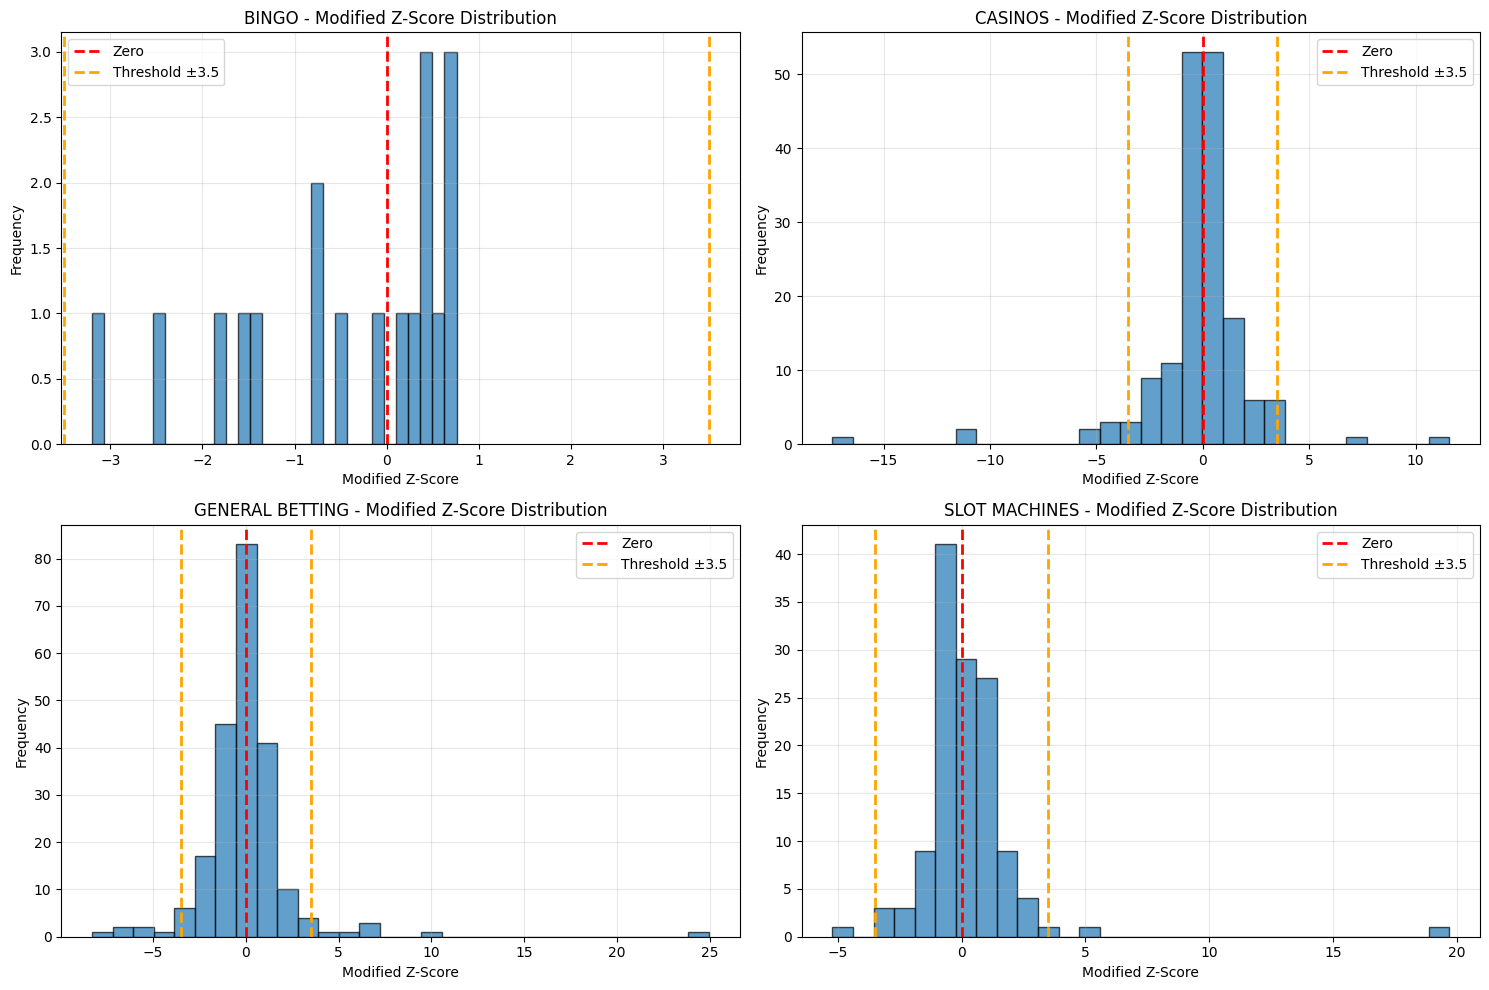


OUTLIERS (|Modified Z-Score| > 3.5): 29 samples
       Category Operator_Name       Date  Normalized_Gaming_Tax  Predicted_Normalized_Tax  Residuals  Modified_Z_Score
GENERAL BETTING       Test 29 2025-03-01               0.302625                  0.132361   0.170264         24.953398
  SLOT MACHINES       Test 35 2024-10-01               0.244246                  0.047163   0.197083         19.694440
        CASINOS       Test 40 2025-06-01               0.141624                  0.029497   0.112127         11.571462
GENERAL BETTING        Test 5 2025-06-01               0.132929                  0.068896   0.064033          9.456646
        CASINOS       Test 31 2024-10-01               0.234133                  0.163689   0.070443          7.169607
GENERAL BETTING       Test 34 2025-01-01               0.119753                  0.072280   0.047473          7.040917
GENERAL BETTING       Test 24 2024-10-01               0.156909                  0.110004   0.046906          6.958119

In [46]:
# Visualize Modified Z-Scores
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, category in enumerate(all_results['Category'].unique()):
    ax = axes[idx // 2, idx % 2]
    
    cat_z_scores = all_results[all_results['Category'] == category]['Modified_Z_Score']
    
    # Histogram
    ax.hist(cat_z_scores, bins=30, edgecolor='black', alpha=0.7)
    ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero')
    ax.axvline(3.5, color='orange', linestyle='--', linewidth=2, label='Threshold ±3.5')
    ax.axvline(-3.5, color='orange', linestyle='--', linewidth=2)
    ax.set_xlabel('Modified Z-Score')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{category} - Modified Z-Score Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show outliers
outliers = all_results[np.abs(all_results['Modified_Z_Score']) > 3.5].sort_values('Modified_Z_Score', ascending=False)
print(f"\n{'='*80}")
print(f"OUTLIERS (|Modified Z-Score| > 3.5): {len(outliers)} samples")
print(f"{'='*80}")
if len(outliers) > 0:
    print(outliers[['Category', 'Operator_Name', 'Date', 'Normalized_Gaming_Tax', 
                     'Predicted_Normalized_Tax', 'Residuals', 'Modified_Z_Score']].head(20).to_string(index=False))

In [47]:
# Export to CSV and Parquet
csv_filename = 'predictions_with_residuals_and_zscores.csv'
parquet_filename = 'predictions_with_residuals_and_zscores.parquet'

# Save to CSV
all_results.to_csv(csv_filename, index=False)
print(f"Data exported to CSV: {csv_filename}")
print(f"  Size: {len(all_results)} rows x {len(all_results.columns)} columns")

# Save to Parquet
all_results.to_parquet(parquet_filename, index=False, engine='pyarrow')
print(f"\nData exported to Parquet: {parquet_filename}")
print(f"  Size: {len(all_results)} rows x {len(all_results.columns)} columns")

print(f"\n{'='*80}")
print("Columns in exported data:")
print(f"{'='*80}")
for i, col in enumerate(all_results.columns, 1):
    print(f"  {i}. {col}")

print(f"\n{'='*80}")
print("Data Types:")
print(f"{'='*80}")
print(all_results.dtypes)

Data exported to CSV: predictions_with_residuals_and_zscores.csv
  Size: 534 rows x 19 columns

Data exported to Parquet: predictions_with_residuals_and_zscores.parquet
  Size: 534 rows x 19 columns

Columns in exported data:
  1. Category
  2. Operator_Name
  3. Month_Year
  4. Avg_Total_Sales
  5. Avg_Total_Payout
  6. Avg_Gaming_Tax
  7. Date
  8. Normalized_Gaming_Tax
  9. Normalized_Gaming_Tax_lag_1
  10. Normalized_Gaming_Tax_lag_2
  11. Normalized_Gaming_Tax_lag_3
  12. Normalized_Gaming_Tax_lag_4
  13. Normalized_Gaming_Tax_lag_5
  14. Normalized_Gaming_Tax_lag_6
  15. Predicted_Normalized_Tax
  16. Residuals
  17. Abs_Residuals
  18. Model_Type
  19. Modified_Z_Score

Data Types:
Category                               object
Operator_Name                          object
Month_Year                             object
Avg_Total_Sales                       float64
Avg_Total_Payout                      float64
Avg_Gaming_Tax                        float64
Date                      

In [48]:
# Final summary
print("="*80)
print("FINAL SUMMARY")
print("="*80)

summary = all_results.groupby('Category').agg({
    'Normalized_Gaming_Tax': ['count', 'mean', 'std'],
    'Residuals': ['mean', 'std'],
    'Abs_Residuals': 'mean',
    'Modified_Z_Score': lambda x: np.sum(np.abs(x) > 3.5)
})
summary.columns = ['Count', 'Mean_Tax', 'Std_Tax', 'Mean_Resid', 'Std_Resid', 'MAE', 'Outliers_Count']
summary['Outlier_Pct'] = 100 * summary['Outliers_Count'] / summary['Count']

print(summary.round(4))

print(f"\n{'='*80}")
print("Export Complete!")
print(f"{'='*80}")
print(f"Files created:")
print(f"  1. {csv_filename}")
print(f"  2. {parquet_filename}")
print(f"\nTotal records: {len(all_results)}")
print(f"Total outliers: {np.sum(np.abs(all_results['Modified_Z_Score']) > 3.5)}")

FINAL SUMMARY
                 Count  Mean_Tax  Std_Tax  Mean_Resid  Std_Resid     MAE  \
Category                                                                   
BINGO               18    0.0778   0.0658     -0.0208     0.0224  0.0211   
CASINOS            168    0.1334   0.1141      0.0007     0.0244  0.0135   
GENERAL BETTING    219    0.0575   0.0354     -0.0005     0.0177  0.0092   
SLOT MACHINES      129    0.0413   0.0292     -0.0005     0.0222  0.0114   

                 Outliers_Count  Outlier_Pct  
Category                                      
BINGO                         0       0.0000  
CASINOS                      11       6.5476  
GENERAL BETTING              14       6.3927  
SLOT MACHINES                 4       3.1008  

Export Complete!
Files created:
  1. predictions_with_residuals_and_zscores.csv
  2. predictions_with_residuals_and_zscores.parquet

Total records: 534
Total outliers: 29


### Step 8: Denormalize Predictions for Easy Comparison

In [49]:
# Denormalize predictions: multiply normalized tax by Total Sales to get actual Gaming Tax
print("Denormalizing Predictions")
print("="*80)

# Calculate actual gaming tax (denormalized)
all_results['Actual_Gaming_Tax'] = all_results['Normalized_Gaming_Tax'] * all_results['Avg_Total_Sales']

# Calculate predicted gaming tax (denormalized)
all_results['Predicted_Gaming_Tax'] = all_results['Predicted_Normalized_Tax'] * all_results['Avg_Total_Sales']

# Calculate denormalized residuals (difference in actual Gaming Tax scale)
all_results['Denormalized_Residuals'] = all_results['Actual_Gaming_Tax'] - all_results['Predicted_Gaming_Tax']

# Calculate absolute denormalized residuals
all_results['Abs_Denormalized_Residuals'] = np.abs(all_results['Denormalized_Residuals'])

print(f"\nSample of denormalized predictions:")
print("="*80)
display_cols = ['Category', 'Operator_Name', 'Date', 
                'Avg_Total_Sales', 'Actual_Gaming_Tax', 'Predicted_Gaming_Tax', 
                'Denormalized_Residuals', 'Model_Type']
print(all_results[display_cols].head(10).to_string(index=False))

print(f"\n\nDenormalized Residuals Summary by Category:")
print("="*80)
denorm_summary = all_results.groupby('Category').agg({
    'Actual_Gaming_Tax': ['mean', 'std'],
    'Predicted_Gaming_Tax': ['mean', 'std'],
    'Denormalized_Residuals': ['mean', 'std'],
    'Abs_Denormalized_Residuals': ['mean', 'max']
}).round(2)
denorm_summary.columns = ['_'.join(col).strip() for col in denorm_summary.columns.values]
print(denorm_summary)

Denormalizing Predictions

Sample of denormalized predictions:
Category Operator_Name       Date  Avg_Total_Sales  Actual_Gaming_Tax  Predicted_Gaming_Tax  Denormalized_Residuals     Model_Type
   BINGO       Test 36 2024-10-01      188176000.0         46949556.0          4.694956e+07            0.000000e+00 Moving Average
   BINGO       Test 36 2024-11-01      407458000.0         63177988.0          8.241899e+07           -1.924101e+07 Moving Average
   BINGO       Test 36 2024-12-01      673890000.0         93988694.0          1.222041e+08           -2.821541e+07 Moving Average
   BINGO       Test 36 2025-01-01      587400000.0         72494082.0          1.065199e+08           -3.402581e+07 Moving Average
   BINGO       Test 36 2025-02-01      576997000.0         76336491.0          8.038358e+07           -4.047085e+06 Moving Average
   BINGO       Test 36 2025-03-01     1450388000.0        160094753.0          1.910580e+08           -3.096326e+07 Moving Average
   BINGO       Test 

In [50]:
# Re-export data with denormalized predictions
csv_filename_denorm = 'predictions_denormalized_full.csv'
parquet_filename_denorm = 'predictions_denormalized_full.parquet'

# Save to CSV
all_results.to_csv(csv_filename_denorm, index=False)
print(f"\n✓ Exported to {csv_filename_denorm}")
print(f"  Shape: {all_results.shape}")

# Save to Parquet
all_results.to_parquet(parquet_filename_denorm, index=False)
print(f"\n✓ Exported to {parquet_filename_denorm}")

print(f"\n\nAll columns in exported data:")
print("="*80)
for i, col in enumerate(all_results.columns, 1):
    print(f"{i:2d}. {col:40s} ({all_results[col].dtype})")

print(f"\n\nKey columns for comparison:")
print("  • Actual_Gaming_Tax: Actual gaming tax in original scale")
print("  • Predicted_Gaming_Tax: Predicted gaming tax in original scale") 
print("  • Denormalized_Residuals: Prediction error in original scale")
print("  • Modified_Z_Score: Outlier detection score for normalized residuals")


✓ Exported to predictions_denormalized_full.csv
  Shape: (534, 23)

✓ Exported to predictions_denormalized_full.parquet


All columns in exported data:
 1. Category                                 (object)
 2. Operator_Name                            (object)
 3. Month_Year                               (object)
 4. Avg_Total_Sales                          (float64)
 5. Avg_Total_Payout                         (float64)
 6. Avg_Gaming_Tax                           (float64)
 7. Date                                     (datetime64[ns])
 8. Normalized_Gaming_Tax                    (float64)
 9. Normalized_Gaming_Tax_lag_1              (float64)
10. Normalized_Gaming_Tax_lag_2              (float64)
11. Normalized_Gaming_Tax_lag_3              (float64)
12. Normalized_Gaming_Tax_lag_4              (float64)
13. Normalized_Gaming_Tax_lag_5              (float64)
14. Normalized_Gaming_Tax_lag_6              (float64)
15. Predicted_Normalized_Tax                 (float64)
16. Residuals     